### Condensed version of plotting script loading from /scratch temp files

SF and MX 3d decompositions for one year of data (output096)  using **xhistogram**


Full computation in `05-03-SF_decomp_MX_decomp-lon.ipynb`


In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
from xgcm import Grid
import numpy as np
import pandas as pd
import cftime
import IPython.display
import cmocean as cm
import cartopy.crs as ccrs
import cartopy.feature as cft
import sys, os
import warnings
warnings.simplefilter("ignore")
from dask.distributed import Client

from xhistogram.xarray import histogram


In [2]:
client = Client(n_workers=8)
client

<Client: 'tcp://127.0.0.1:45783' processes=8 threads=16, memory=250.00 GiB>

In [3]:
# files:
base = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/';
xch = 1440#2*288
ych = 1080#2*216

fgrd   = xr.open_dataset(base + 'output096/ocean/ocean_grid.nc').chunk({'yt_ocean':ych,'yu_ocean':ych,'xt_ocean':xch,'xu_ocean':xch})
fwmass_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096/ocean_wmass_mean.nc').chunk({'grid_yt_ocean':ych,'grid_yu_ocean':ych,'grid_xt_ocean':xch})
fmonth_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096/ocean_month_mean.nc').chunk({'yt_ocean':ych,'yu_ocean':ych,'xt_ocean':xch})
fheat_mean = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096/ocean_heat_mean.nc').chunk({'yt_ocean':ych,'xt_ocean':xch})

# load RYF monthly data
base_msc = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/'
# ---------------------------------------------------------------------------------- #
# load in data set ----------------------------------------------------------------- #
fmonth_m = xr.open_mfdataset(base_msc+'output096/ocean/ocean_month.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fheat_m = xr.open_mfdataset(base_msc+'output096/ocean/ocean_heat.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fwmass_m = xr.open_mfdataset(base_msc+'output096/ocean/ocean_wmass.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})

# load RYF daily data
base_msc = '/scratch/e14/cy8964/access-om2/archive/025deg_jra55_ryf/'
# ---------------------------------------------------------------------------------- #
# load in data set ----------------------------------------------------------------- #
fdaily = xr.open_mfdataset(base_msc+'output096/ocean/ocean_daily.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fheat_daily = xr.open_mfdataset(base_msc+'output096/ocean/ocean_heat_daily.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'yt_ocean':ych/10,'xt_ocean':xch/10})
fwmass_daily = xr.open_mfdataset(base_msc+'output096/ocean/ocean_wmass_daily.nc',combine='by_coords',chunks={'time': 1},decode_times = True).chunk({'time': 1,'grid_yt_ocean':ych/10,'grid_xt_ocean':xch/10})

# ---------------------------------------------------------------------------------- #

# Generate xgcm grid object:
gridwm = Grid(fwmass_m,coords={"x":{"center":"grid_xt_ocean"},
                             "y":{"center":"grid_yt_ocean","right":"grid_yu_ocean"},
                             "T":{"center":"neutral","outer":"neutralrho_edges"}},periodic=False)
gridmn = Grid(fmonth_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
gridht = Grid(fheat_m,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)
gridd = Grid(fdaily,coords={"x":{"center":"xt_ocean"},
                             "y":{"center":"yt_ocean","right":"yu_ocean"},
                             "z":{"center":"st_ocean","outer":"st_edges_ocean"}},periodic=False)

# ---------------------------------------------------------------------------------- #

# Some constants:
Cp = 3992.10322329649
rho0 = 1035
dT = (fwmass_m.neutral[1]-fwmass_m.neutral[0]).values

sc_daylength = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

area = fgrd.area_t.rename({'xt_ocean':'grid_xt_ocean','yt_ocean':'grid_yt_ocean'})
dy = gridmn.diff(fgrd.yu_ocean,'y',boundary='extend').rename({'yt_ocean':'grid_yt_ocean'})

### Load 3d (x,y,temp) data separated by timescale

In [4]:
True_1year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096_3d/True_1year_means_corrected.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

In [5]:
Mean_1year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096_3d/Mean_1year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

In [6]:
Twomo_mean_1year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096_3d/2mo_mean_1year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

In [7]:
Tenday_mean_1year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096_3d/10day_mean_1year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych, 'grid_xt_ocean':xch})

In [8]:
Oneday_mean_1year_means = xr.open_mfdataset('/scratch/e14/cy8964/temp/025deg_096_3d/1day_mean_1year_means.nc').chunk({'grid_yu_ocean':ych,'grid_yt_ocean':ych,'grid_xt_ocean':xch})

In [9]:
def plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar2, MXcbar2, title):
    
    plt.figure(figsize=(45,20),facecolor='w')
    Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

    cmap = 'coolwarm'

    plt.subplot(3,7,1)
    (DataSet.Psi.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar,x='grid_yu_ocean',cbar_kwargs={'label':'Sv'},cmap=cmap)
    plt.title('Streamfunction', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,2)
    (Hf.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar,x='grid_yu_ocean',cbar_kwargs={'label':'PW'},cmap=cmap)
    plt.title('Heat Function', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,8)
    (DataSet.SF.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Surface Forcing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,9)
    (DataSet.temp_vdiffuse_sbc.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_sbc', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,10)
    (DataSet.sw_heat.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Shortwave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,11)
    (DataSet.frazil_3d.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Frazil', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,12)
    ((DataSet.SF-DataSet.sw_heat-DataSet.frazil_3d-DataSet.temp_vdiffuse_sbc).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('sfc_hflux_pme', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    
    plt.subplot(3,7,15)
    ((DataSet.MX).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Vertical Mixing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,16)
    ((DataSet.temp_vdiffuse_diff_cbt_kppbl).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppbl', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,17)
    temp = DataSet.MX-DataSet.temp_vdiffuse_diff_cbt_wave-DataSet.temp_vdiffuse_diff_cbt_kppdd - \
           DataSet.temp_vdiffuse_diff_cbt_kppbl - DataSet.temp_vdiffuse_diff_cbt_kppicon - \
           DataSet.temp_vdiffuse_diff_cbt_kppish
    ((temp).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_nonlocal_KPP', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,18)
    ((DataSet.temp_vdiffuse_diff_cbt_kppish).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppish', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,19)
    ((DataSet.temp_vdiffuse_diff_cbt_kppicon).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppicon', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')


    plt.subplot(3,7,20)
    ((DataSet.temp_vdiffuse_diff_cbt_kppdd).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppdd', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,21)
    ((DataSet.temp_vdiffuse_diff_cbt_wave).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar2,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_wave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    
    
    plt.suptitle(title, fontsize = 18)
    plt.show()

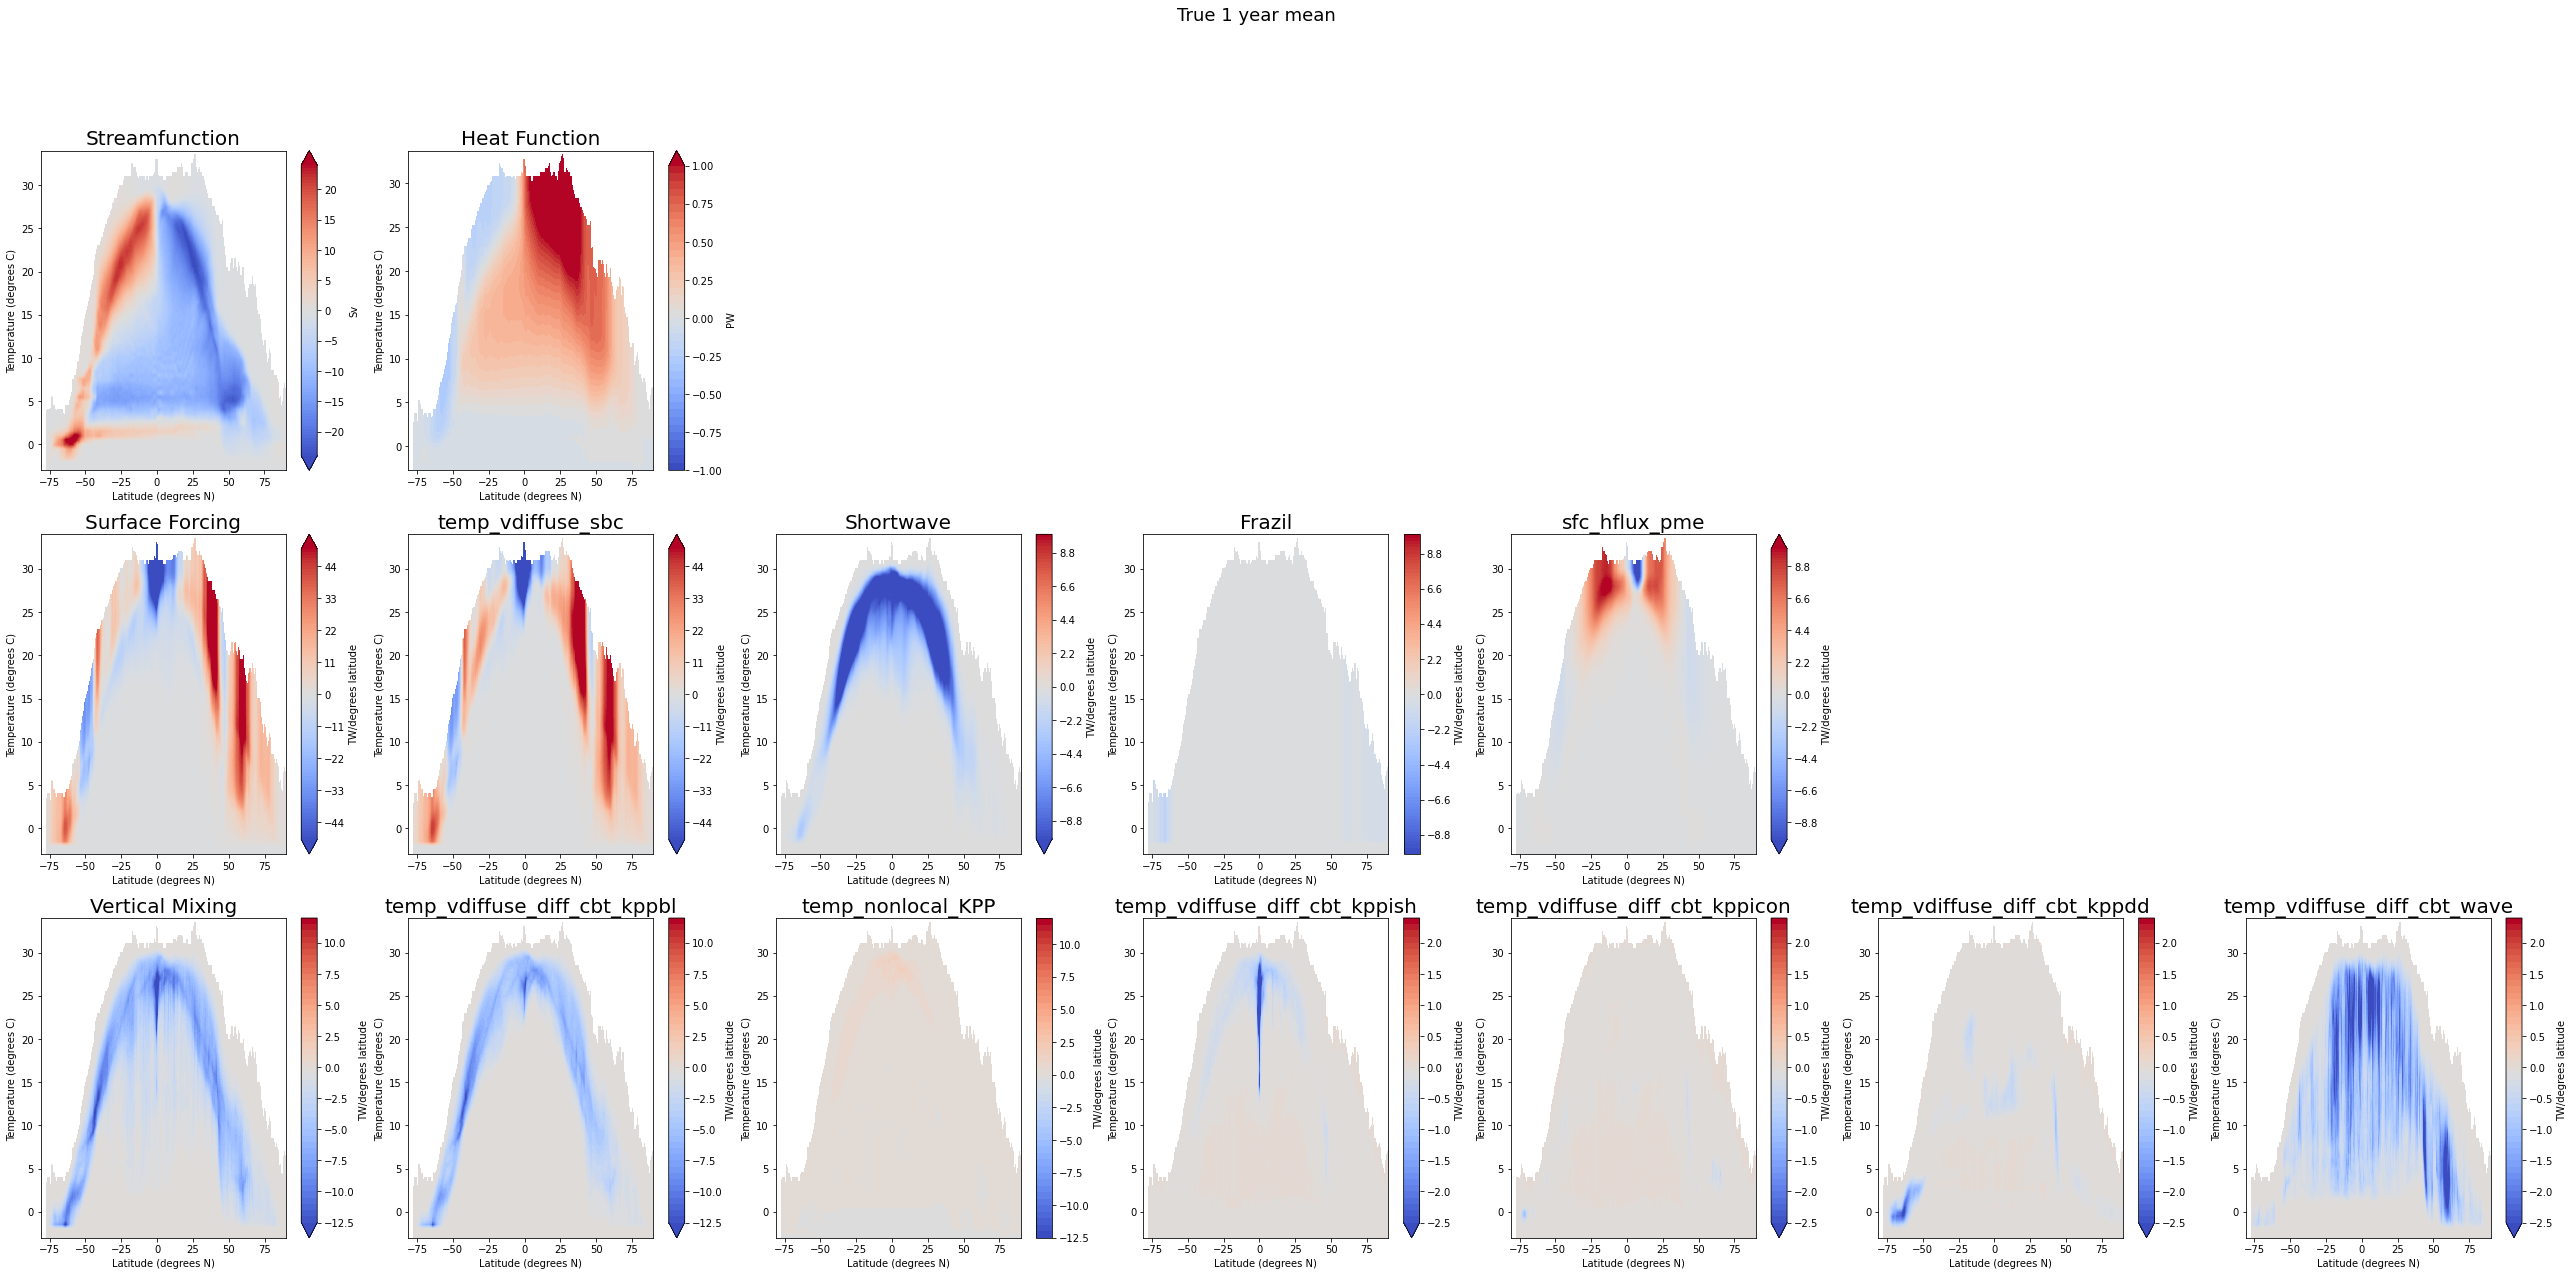

In [10]:
DataSet = True_1year_means
# masking:
maskPsi = 0*True_1year_means.Psi.sum('grid_xt_ocean').where(True_1year_means.Psi.sum('grid_xt_ocean')!=True_1year_means.Psi.sum('grid_xt_ocean').isel(neutralrho_edges=-1))+1.
maskHf = gridwm.interp(maskPsi,'T')
maskSF = gridwm.interp(maskPsi,'y',boundary="fill",fill_value=0.)
maskSF

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)/2
plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/10, 'True 1 year mean')

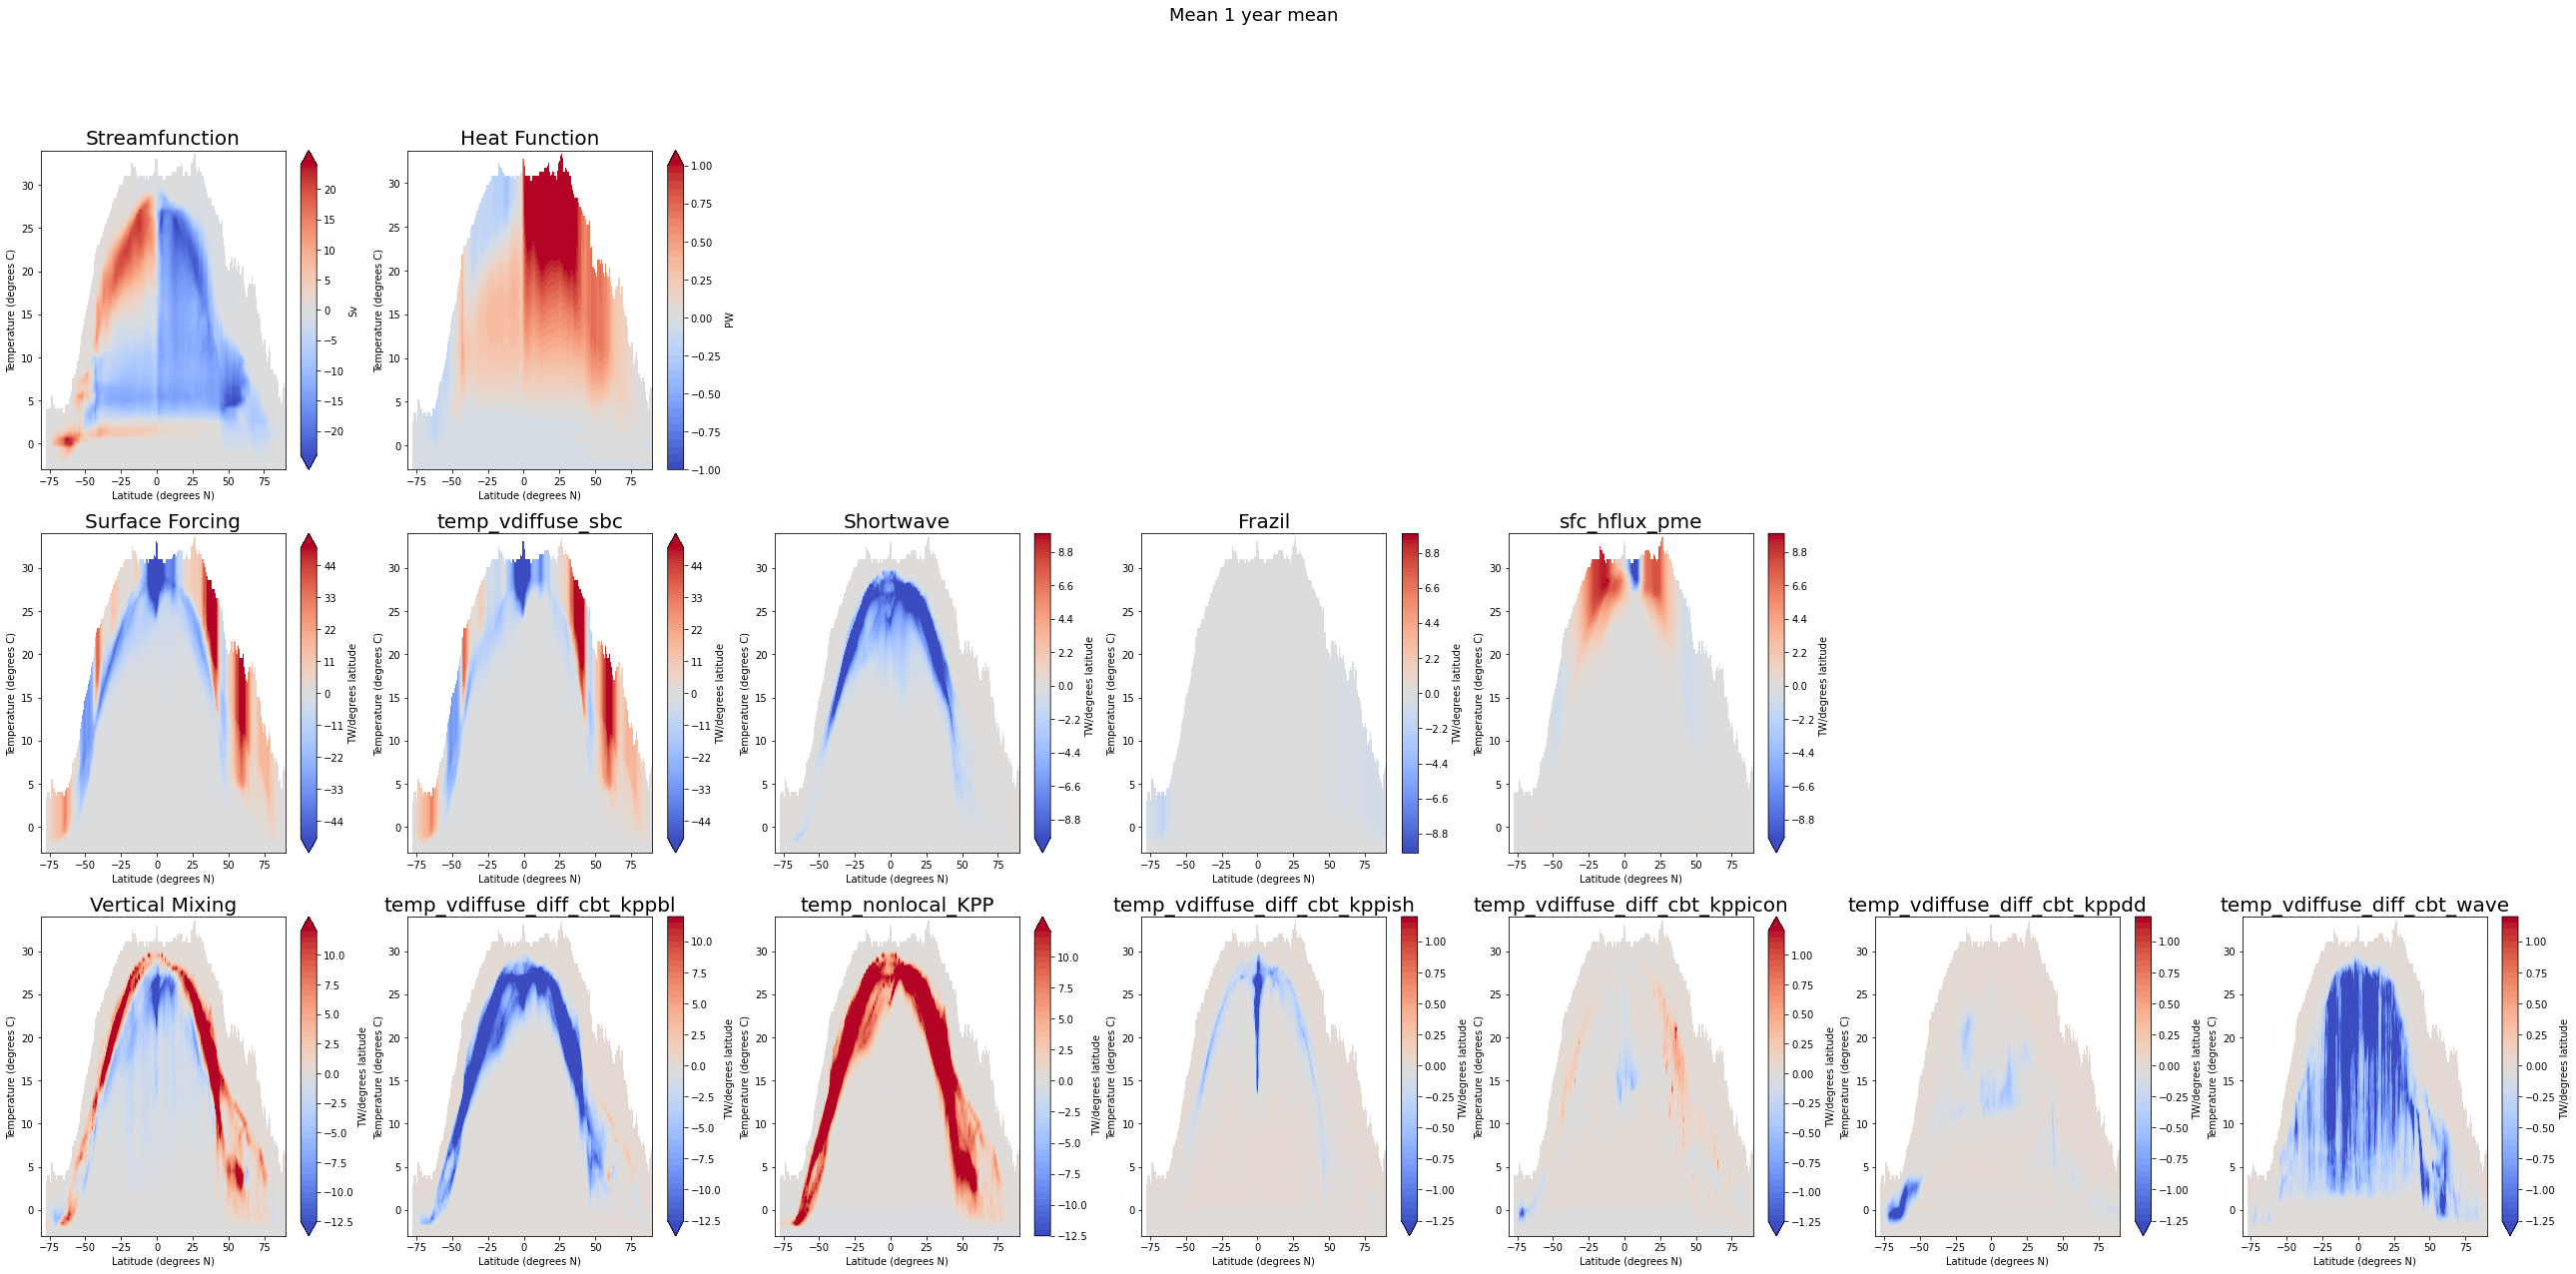

In [11]:
DataSet = Mean_1year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)


Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)/2

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/10,  'Mean 1 year mean')

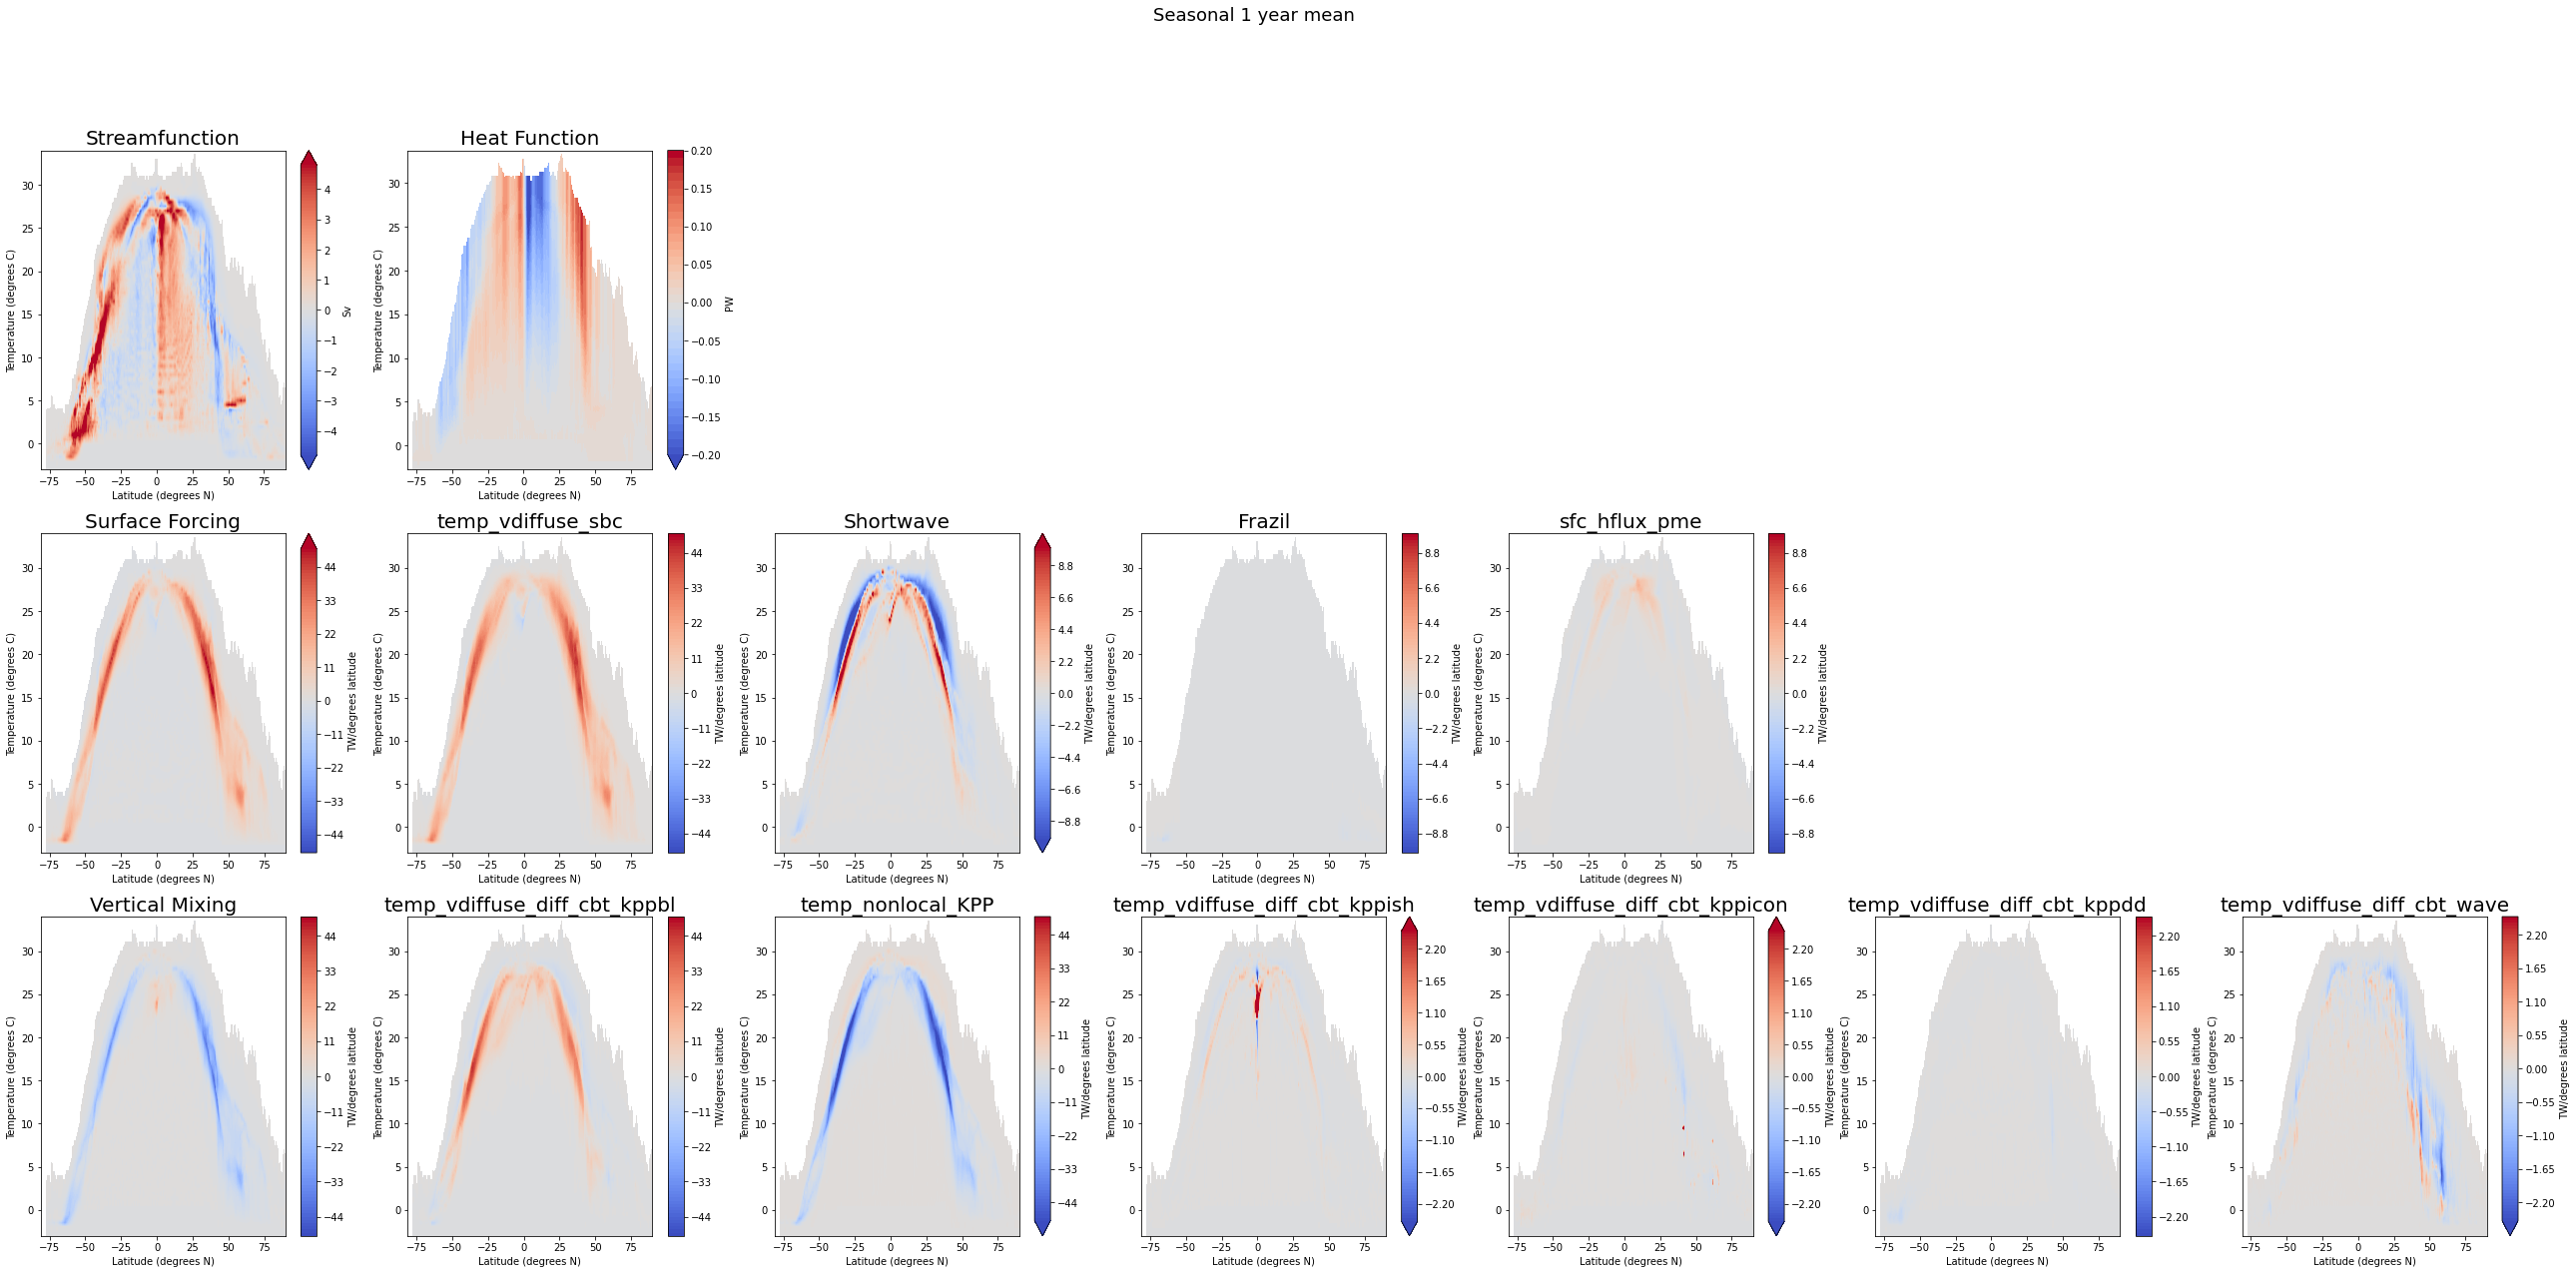

In [28]:
DataSet = Twomo_mean_1year_means - Mean_1year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-24.,24.5,0.5)/5
Hfcbar = np.arange(-1.,1.05,0.05)/5
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-50.,51.,1.)

cmap = 'coolwarm'

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/20,  'Seasonal 1 year mean')

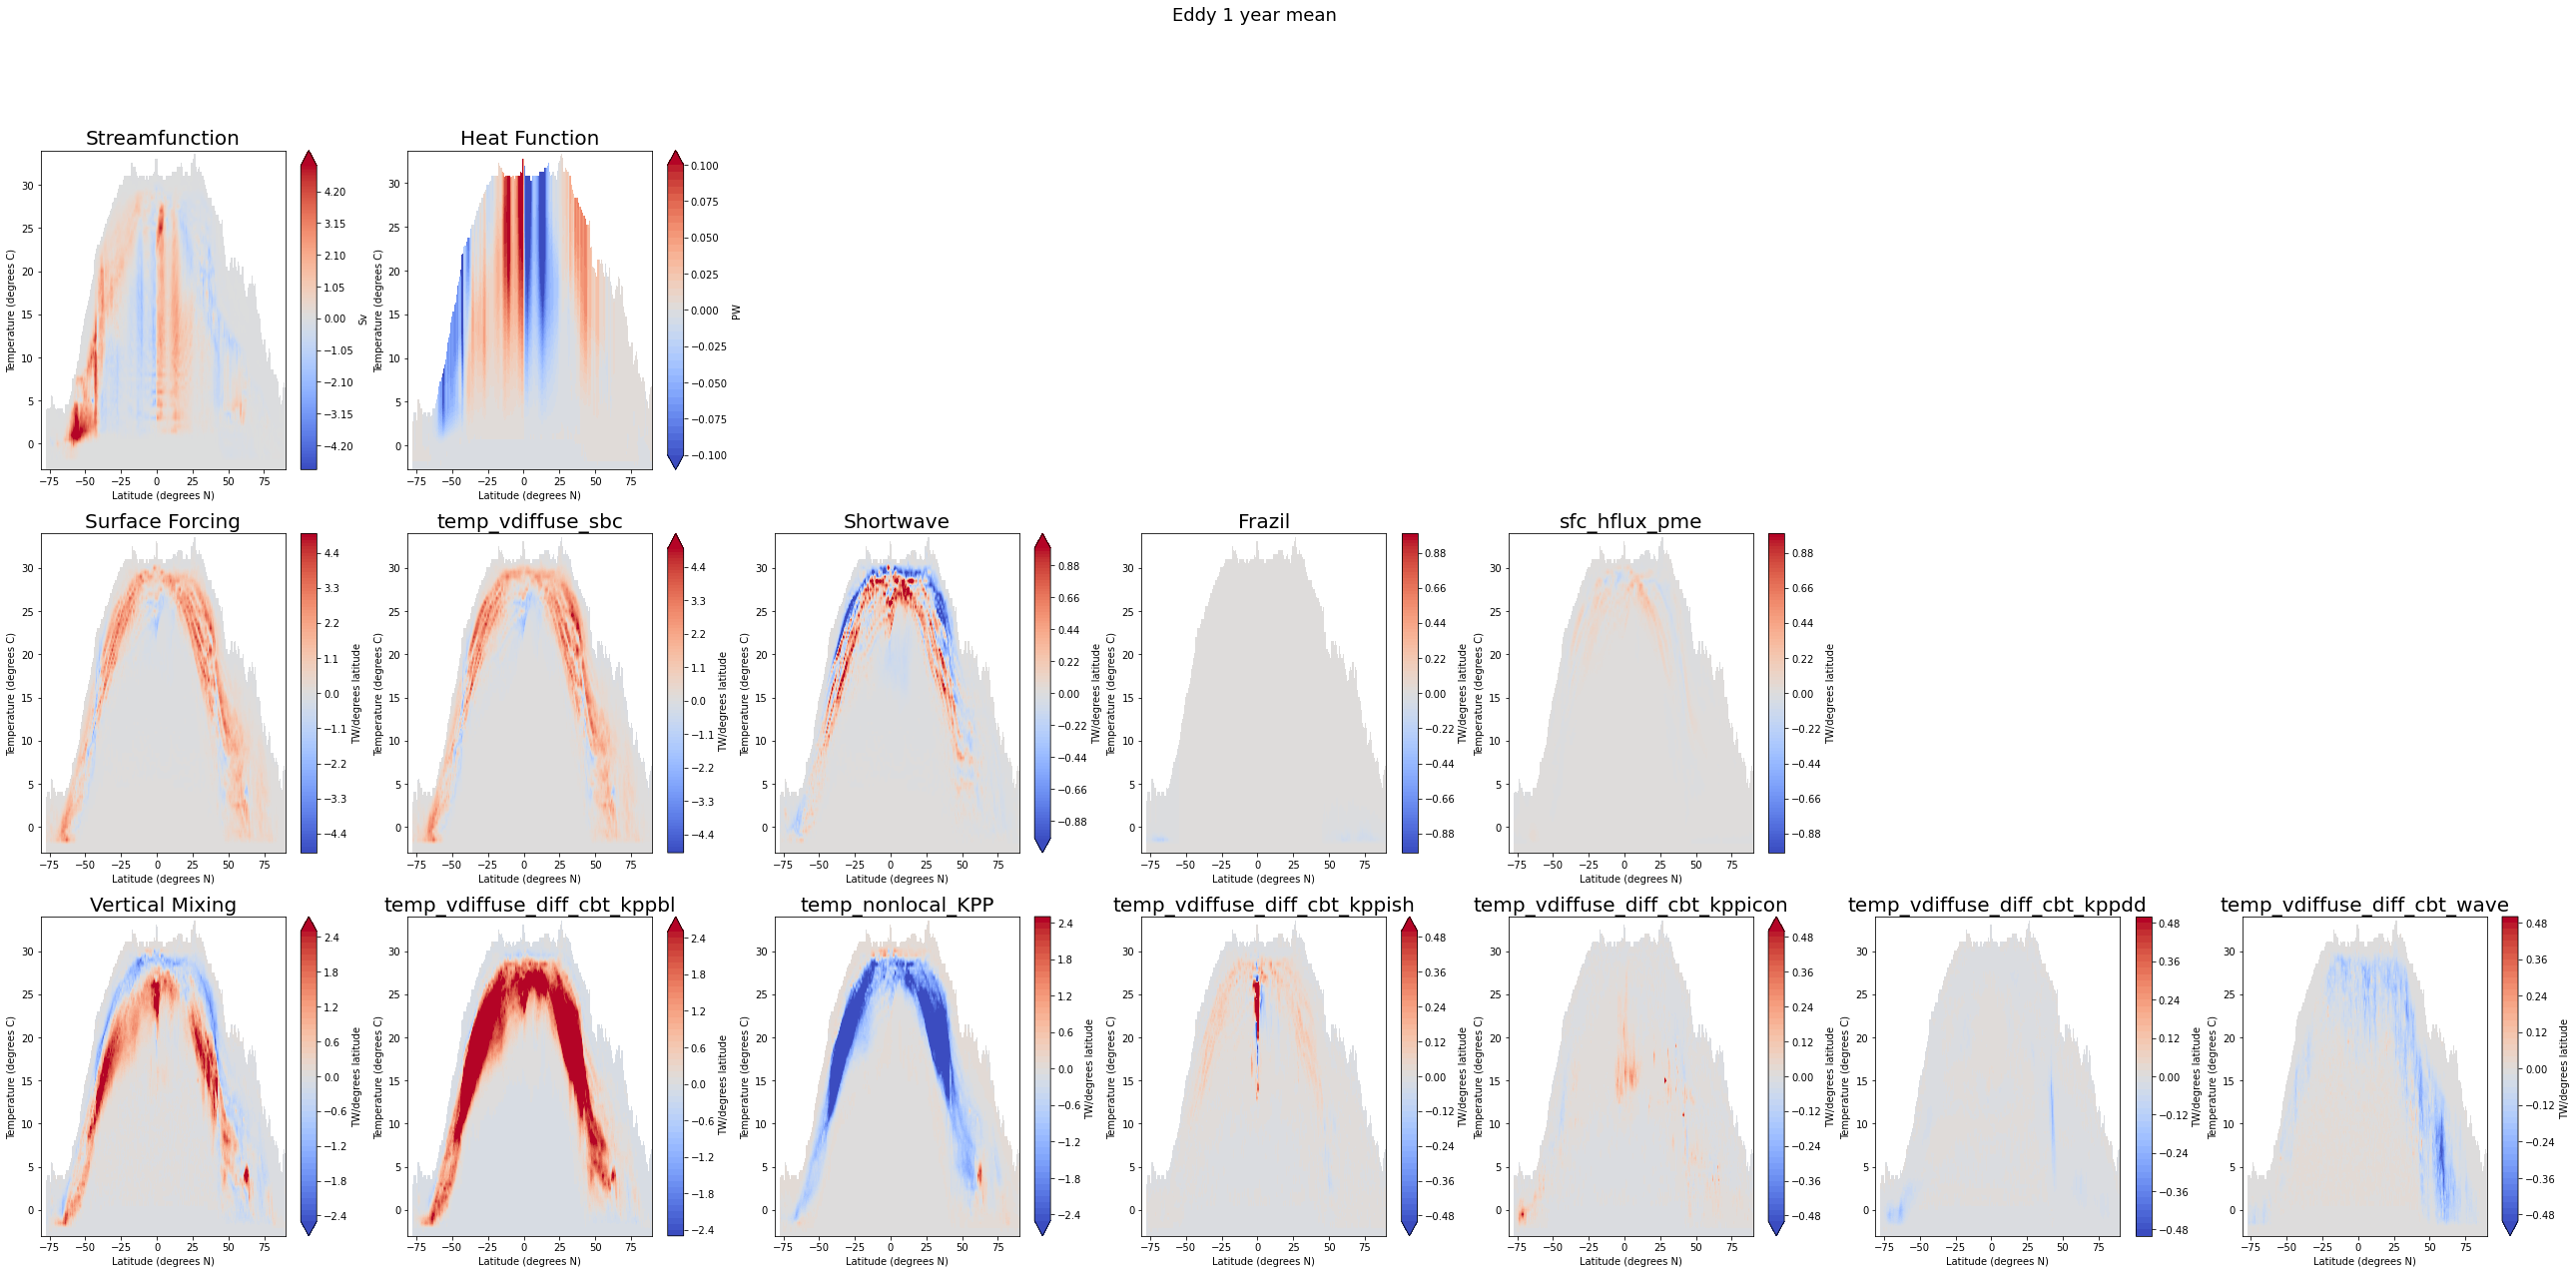

In [14]:

DataSet = Tenday_mean_1year_means - Twomo_mean_1year_means
Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-5.,5.1,0.05)
Hfcbar = np.arange(-0.1,0.105,0.005)
SFcbar = np.arange(-5.,5.1,0.1)
MXcbar = np.arange(-2.5,2.51,0.1)

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/10,  'Eddy 1 year mean')

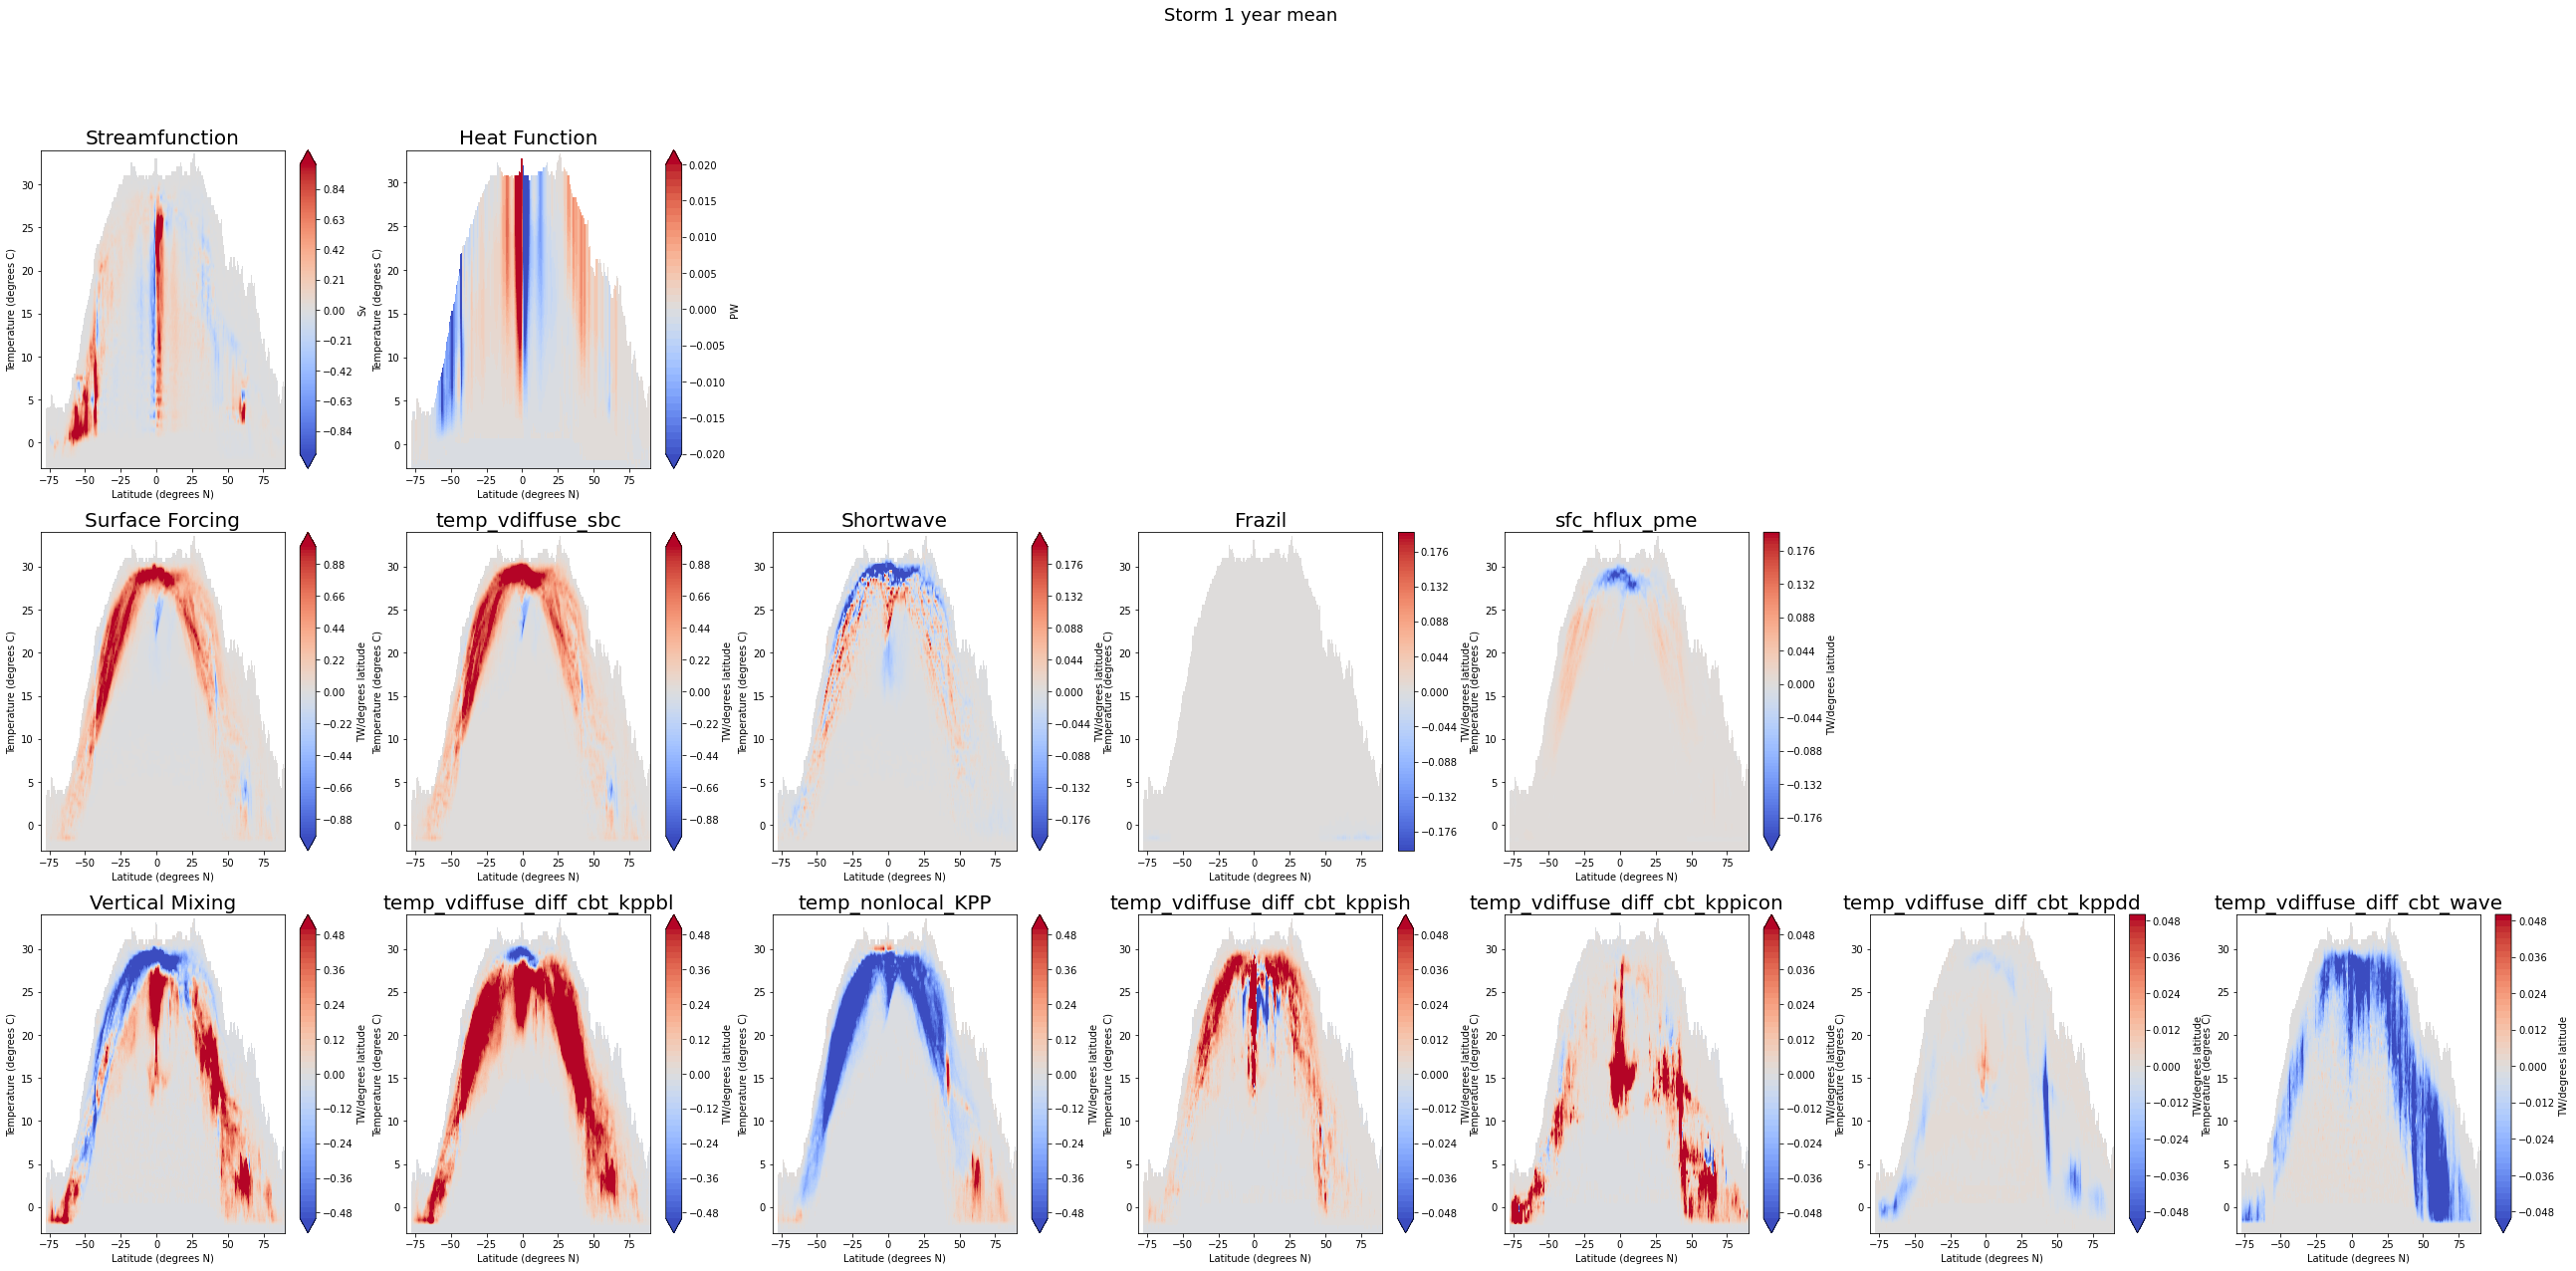

In [13]:
DataSet = Oneday_mean_1year_means - Tenday_mean_1year_means
Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-5.,5.1,0.05)/5
Hfcbar = np.arange(-0.1,0.105,0.005)/5
SFcbar = np.arange(-5.,5.1,0.1)/5
MXcbar = np.arange(-2.5,2.51,0.1)/5

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/10,  'Storm 1 year mean')

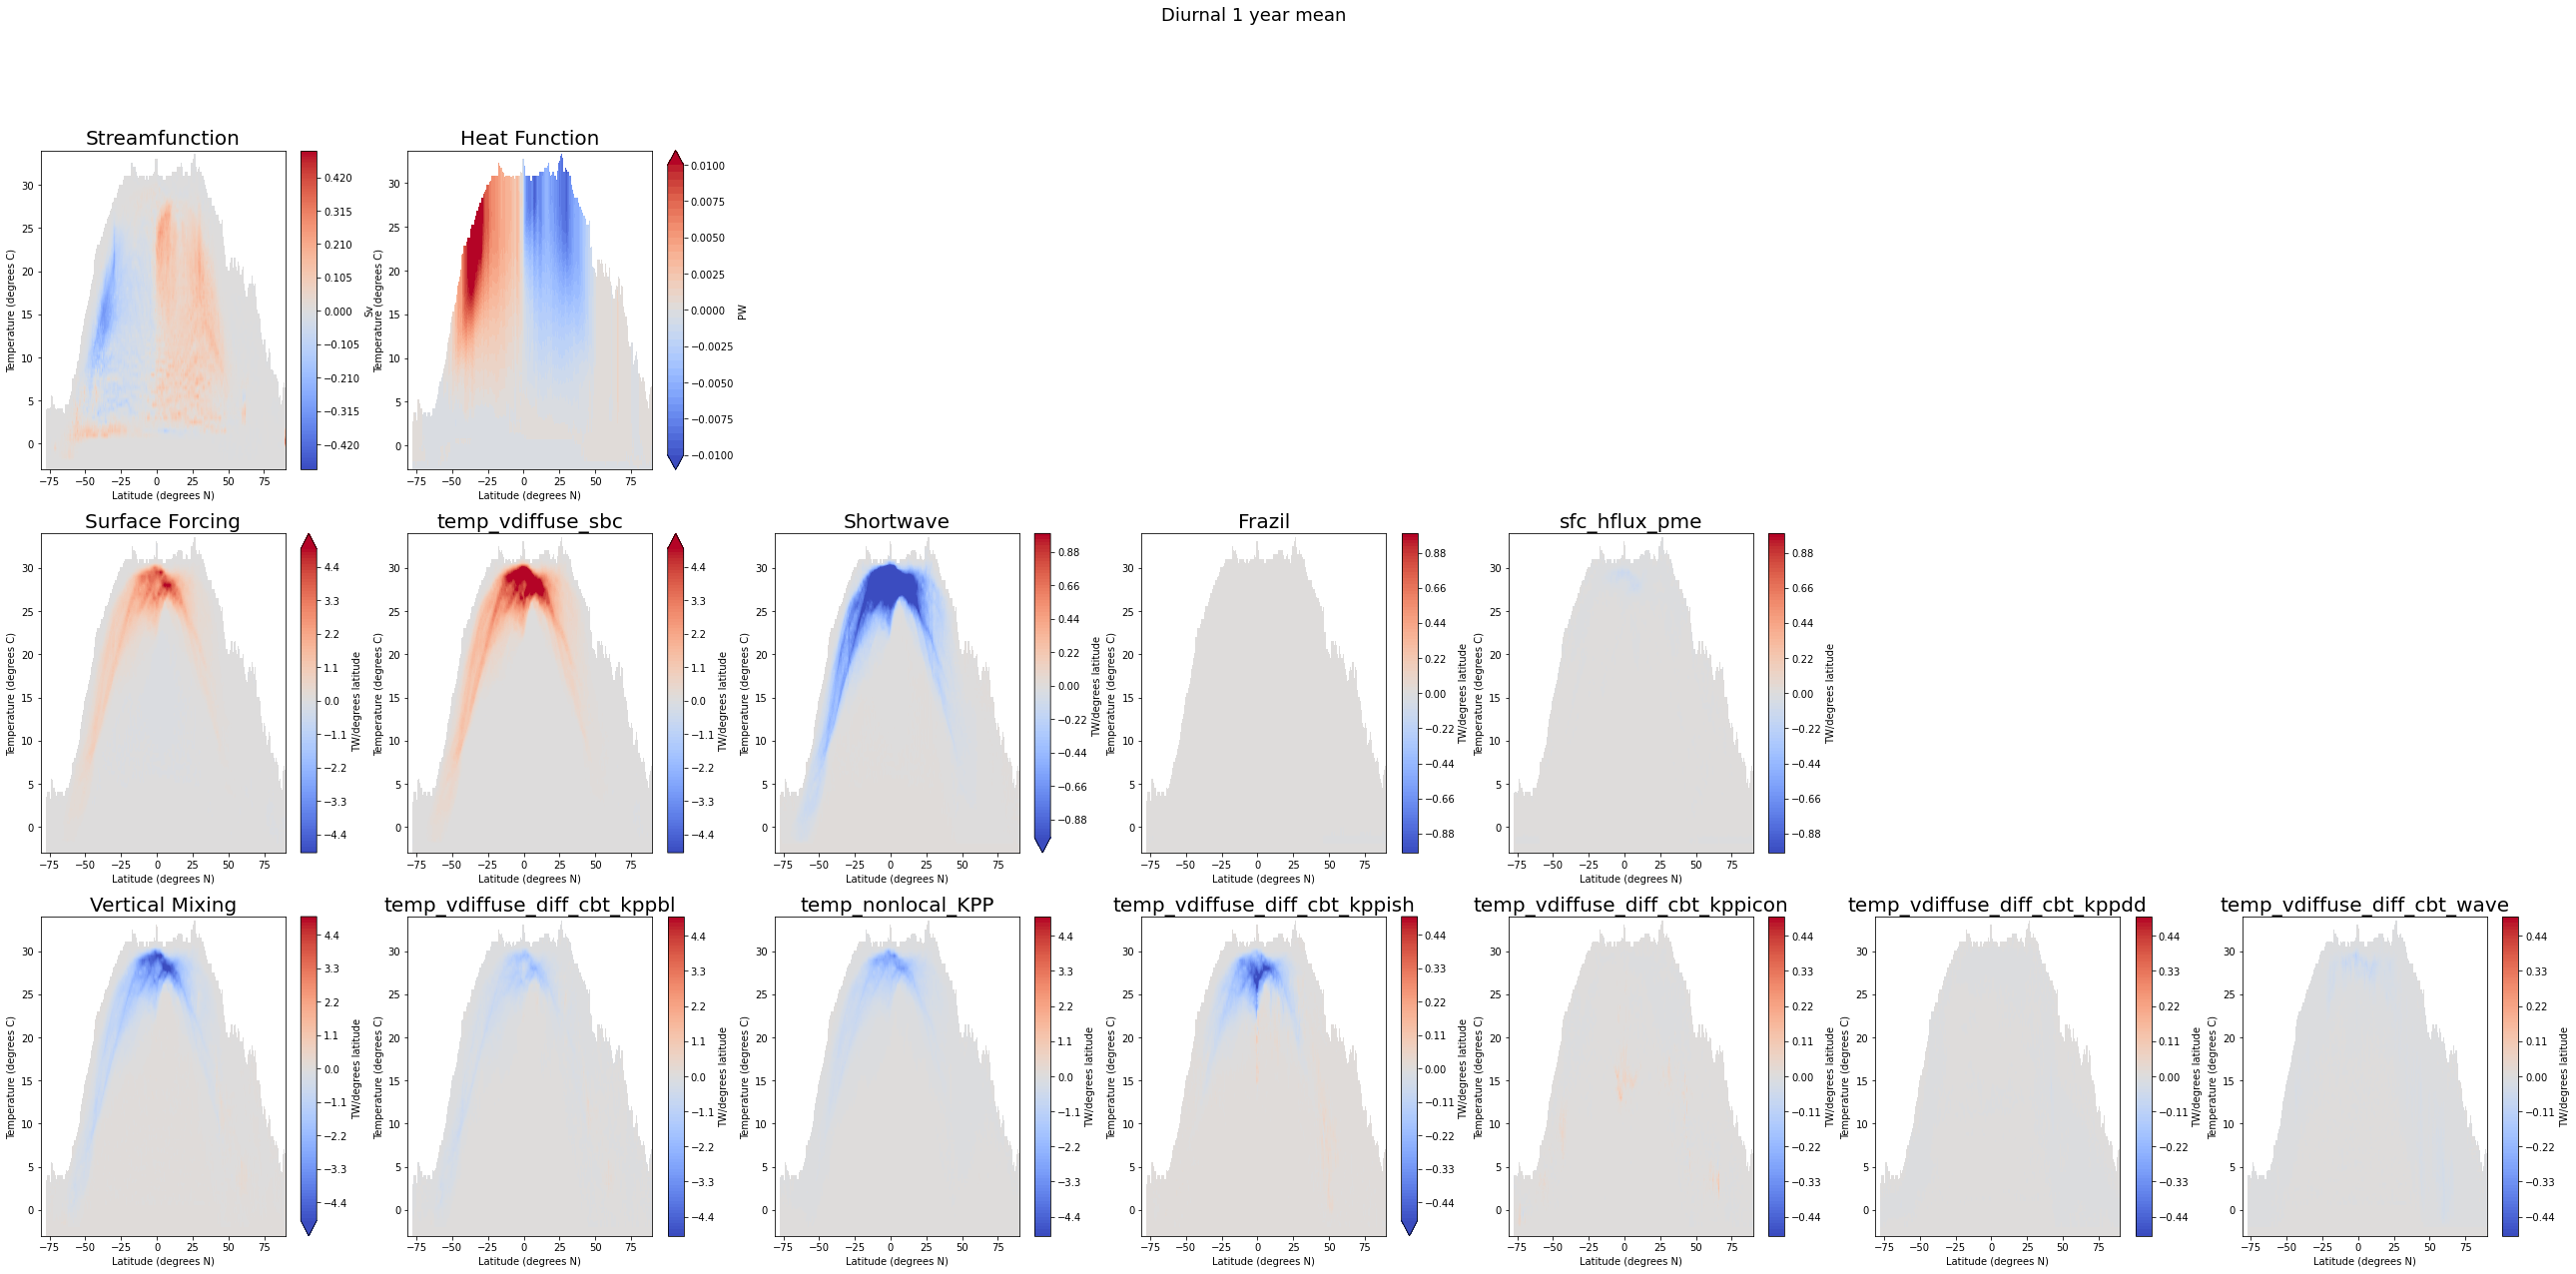

In [27]:
DataSet =  True_1year_means - Oneday_mean_1year_means

Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

Psicbar = np.arange(-5.,5.1,0.05)/10
Hfcbar = np.arange(-0.1,0.105,0.005)/10
SFcbar = np.arange(-5.,5.1,0.1)
MXcbar = np.arange(-5.,5.1,0.1)

plot_decomp_3d_to_2d(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar,SFcbar/5, MXcbar/10,  'Diurnal 1 year mean')

## Integrate in latitude direction:

(-80.0, 80.0)

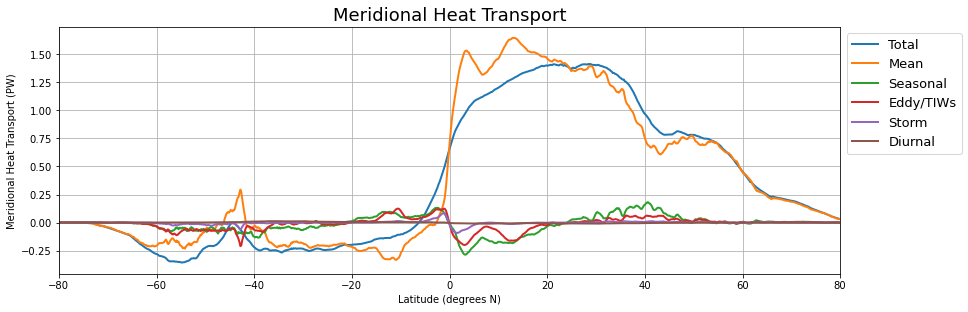

2022-05-06 11:55:26,449 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,581 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,584 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,642 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,700 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,767 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,848 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:26,910 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,055 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,057 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,061 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,201 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,263 - distributed.nanny - WARNING - Restarting worker
2022-05-06 11:55:27,314 - distributed.

In [21]:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
Hf = -Cp*rho0*dT*gridwm.cumsum(True_1year_means.Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)
Hf_mean_tot = -Cp*rho0*dT*gridwm.cumsum(Mean_1year_means.Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)
Hf_ac = -Cp*rho0*dT*gridwm.cumsum((Twomo_mean_1year_means - Mean_1year_means).Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)
Hf_TIWs = -Cp*rho0*dT*gridwm.cumsum((Tenday_mean_1year_means - Twomo_mean_1year_means).Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)
Hf_storm = -Cp*rho0*dT*gridwm.cumsum((Oneday_mean_1year_means- Tenday_mean_1year_means).Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)
Hf_diurnal = -Cp*rho0*dT*gridwm.cumsum((True_1year_means-Oneday_mean_1year_means).Psi.sum('grid_xt_ocean'),'T',boundary="fill", fill_value=0)

(Hf/1.e15).isel(neutral=-1).plot(label='Total',linewidth=2)
(Hf_mean_tot/1.e15).isel(neutral=-1).plot(label='Mean',linewidth=2)
(Hf_ac/1.e15).isel(neutral=-1).plot(label='Seasonal',linewidth=2)
(Hf_TIWs/1.e15).isel(neutral=-1).plot(label='Eddy/TIWs',linewidth=2)
(Hf_storm/1.e15).isel(neutral=-1).plot(label='Storm',linewidth=2)
(Hf_diurnal/1.e15).isel(neutral=-1).plot(label='Diurnal',linewidth=2)

plt.legend(bbox_to_anchor = (1,1),loc='upper left', fontsize = 13)
plt.ylabel('Meridional Heat Transport (PW)')
plt.xlabel('Latitude (degrees N)')
plt.title('Meridional Heat Transport', fontsize = 18)
plt.grid()
plt.xlim([-80.,80.])


In [20]:
def plot_decomp_diathermalHT_3d_to_1d(DataSet, title):

    # Totals in temperature and meridional directions:
    plt.figure(figsize=(14,5))

    plt.subplot()
    (DataSet.SF.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Surface Forcing',color='C0',linewidth=4)
    (DataSet.sw_heat.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Shortwave',color='C1',linewidth=2)
    ((DataSet.SF-DataSet.sw_heat).sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='vdiffuse_sbc+frazil+pme',color='C2',linewidth=2)
    ((DataSet.MX+DataSet.SF).sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Vertical Mixing+Surface Forcing',color='k',linestyle='dotted',linewidth=4)
    
    (DataSet.MX.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Vertical Mixing',color='C3',linestyle='dashed',linewidth=4)
    (DataSet.temp_vdiffuse_diff_cbt_kppish.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_vdiffuse_diff_cbt_kppish',color='C4',linestyle='dashed',linewidth=2)
    (DataSet.temp_vdiffuse_diff_cbt_kppicon.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_vdiffuse_diff_cbt_kppicon',color='C5',linestyle='dashed',linewidth=2)
    (DataSet.temp_vdiffuse_diff_cbt_kppbl.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_vdiffuse_diff_cbt_kppbl',color='C6',linestyle='dashed',linewidth=2)
    (DataSet.temp_vdiffuse_diff_cbt_kppdd.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_vdiffuse_diff_cbt_kppdd',color='C7',linestyle='dashed',linewidth=2)
    (DataSet.temp_vdiffuse_diff_cbt_wave.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_vdiffuse_diff_cbt_wave',color='C8',linestyle='dashed',linewidth=2)
    temp = DataSet.MX-DataSet.temp_vdiffuse_diff_cbt_wave-DataSet.temp_vdiffuse_diff_cbt_kppdd - \
           DataSet.temp_vdiffuse_diff_cbt_kppbl - DataSet.temp_vdiffuse_diff_cbt_kppicon - \
           DataSet.temp_vdiffuse_diff_cbt_kppish
    (temp.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='temp_nonlocal_KPP',color='C9',linestyle='dashed',linewidth=2)

    plt.legend(bbox_to_anchor = (1,1),loc='upper left', fontsize = 13)
    plt.ylabel('Diathermal Heat Transport (PW)')
    plt.xlabel('Temperature (degrees C)')
    plt.title('Diathermal Heat Transport', fontsize = 18)
    plt.grid()
    plt.xlim([-3.,31.])
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(right = 0.75)
    plt.show()

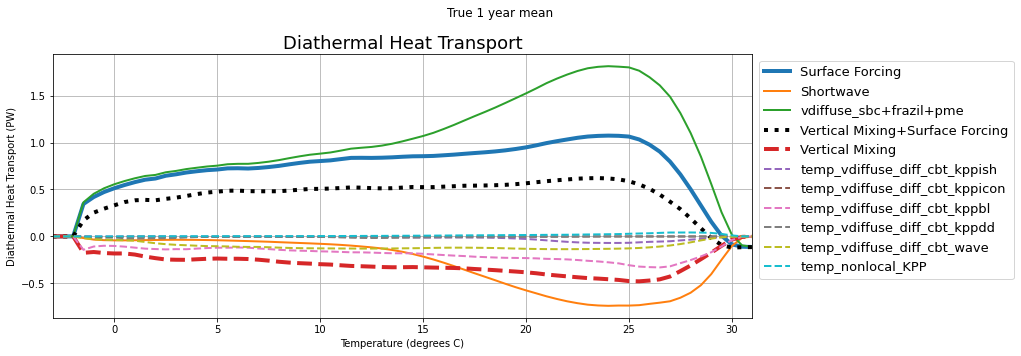

In [21]:
plot_decomp_diathermalHT_3d_to_1d(True_1year_means, 'True 1 year mean')

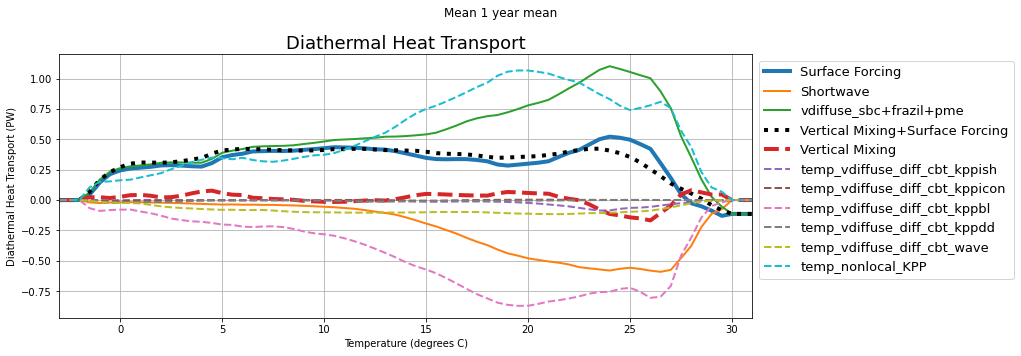

In [22]:
plot_decomp_diathermalHT_3d_to_1d(Mean_1year_means, 'Mean 1 year mean')

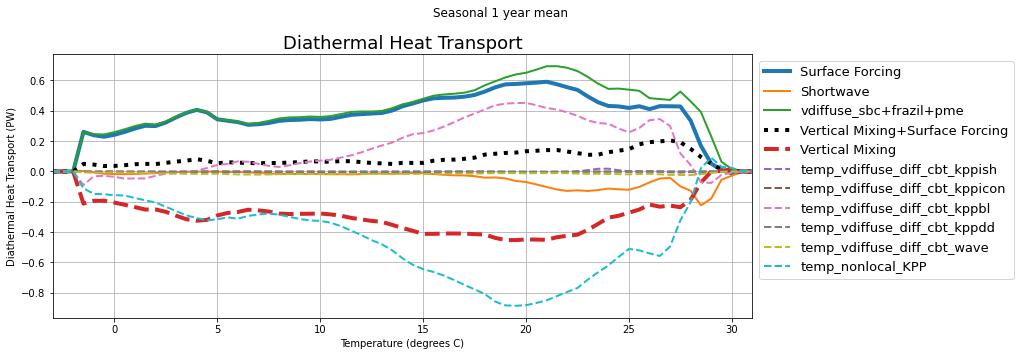

In [23]:
plot_decomp_diathermalHT_3d_to_1d(Twomo_mean_1year_means - Mean_1year_means, 'Seasonal 1 year mean')

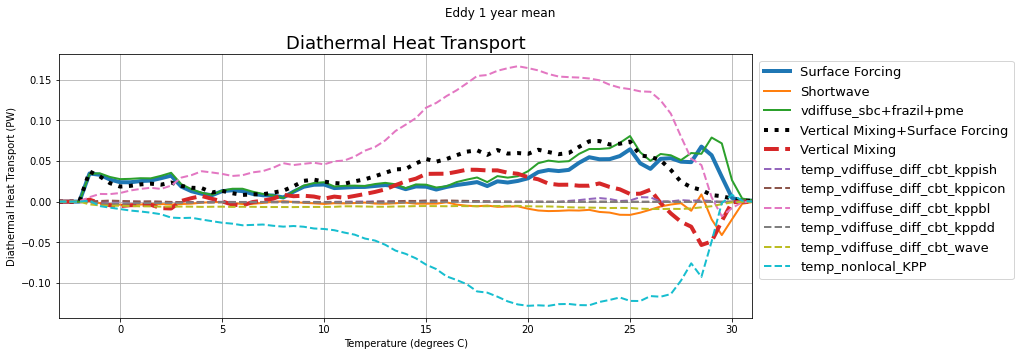

In [24]:
plot_decomp_diathermalHT_3d_to_1d(Tenday_mean_1year_means - Twomo_mean_1year_means, 'Eddy 1 year mean')

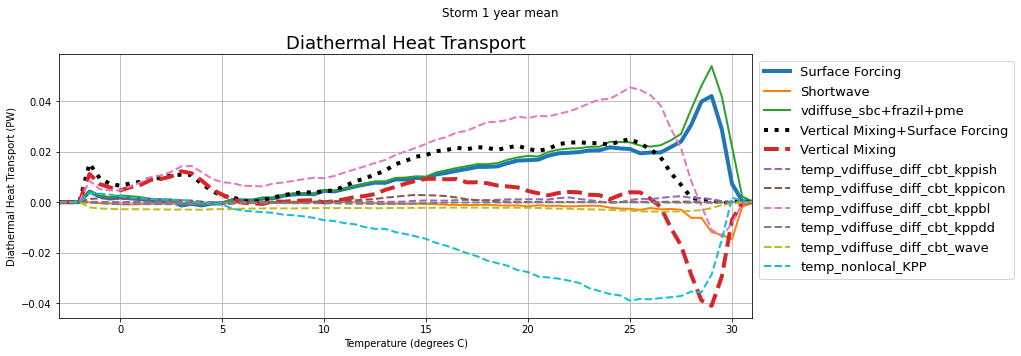

In [25]:
plot_decomp_diathermalHT_3d_to_1d(Oneday_mean_1year_means- Tenday_mean_1year_means , 'Storm 1 year mean')

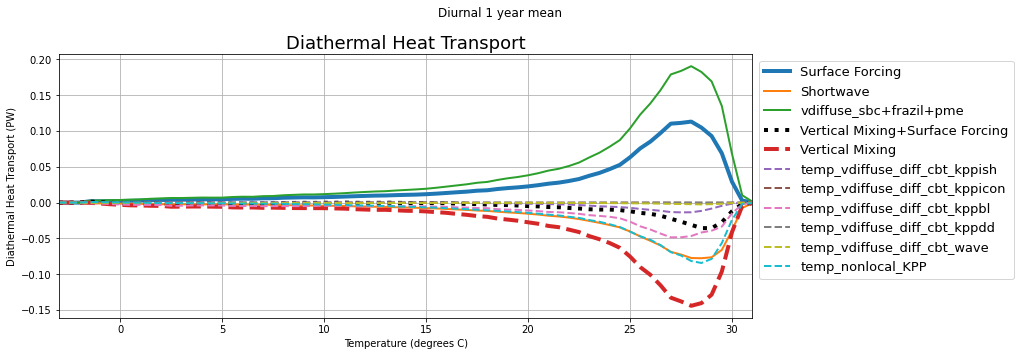

In [26]:
plot_decomp_diathermalHT_3d_to_1d(True_1year_means-Oneday_mean_1year_means , 'Diurnal 1 year mean')

## Spatial Maps Integrated Over Temperature

In [22]:
def plot_decomp_map(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar2, MXcbar2, title):
    
    plt.figure(figsize=(50,15),facecolor='w')
    Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

    plt.subplot(3,7,8)
    (DataSet.SF.sum('neutralrho_edges')/1.e12).plot.contourf(levels=SFcbar,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Surface Forcing', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,9)
    (DataSet.temp_vdiffuse_sbc.sum('neutralrho_edges')/1.e12).plot.contourf(levels=SFcbar,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_sbc', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,10)
    (DataSet.sw_heat.sum('neutralrho_edges')/1.e12).plot.contourf(levels=SFcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Shortwave', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,11)
    (DataSet.frazil_3d.sum('neutralrho_edges')/1.e12).plot.contourf(levels=SFcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Frazil', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,12)
    ((DataSet.SF-DataSet.sw_heat-DataSet.frazil_3d-DataSet.temp_vdiffuse_sbc).sum('neutralrho_edges')/1.e12).plot.contourf(levels=SFcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('sfc_hflux_pme', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    
    plt.subplot(3,7,15)
    ((DataSet.MX).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Vertical Mixing', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,16)
    ((DataSet.temp_vdiffuse_diff_cbt_kppbl).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppbl', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,17)
    temp = DataSet.MX-DataSet.temp_vdiffuse_diff_cbt_wave-DataSet.temp_vdiffuse_diff_cbt_kppdd - \
           DataSet.temp_vdiffuse_diff_cbt_kppbl - DataSet.temp_vdiffuse_diff_cbt_kppicon - \
           DataSet.temp_vdiffuse_diff_cbt_kppish
    ((temp).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_nonlocal_KPP', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,18)
    ((DataSet.temp_vdiffuse_diff_cbt_kppish).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppish', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,19)
    ((DataSet.temp_vdiffuse_diff_cbt_kppicon).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppicon', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')


    plt.subplot(3,7,20)
    ((DataSet.temp_vdiffuse_diff_cbt_kppdd).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppdd', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    plt.subplot(3,7,21)
    ((DataSet.temp_vdiffuse_diff_cbt_wave).sum('neutralrho_edges')/1.e12).plot.contourf(levels=MXcbar2,y='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_wave', fontsize = 20)
    plt.ylabel('Latitude (degrees N)')
    plt.xlabel('Longitude (degrees E)')

    
    
    plt.suptitle(title, fontsize = 18)
    plt.show()

## Plot integral from $\Theta$ to $\infty$

$\int_\Theta^\infty = \int_{-\infty}^\infty + \int^{-\infty}_\Theta = \int_{-\infty}^\infty - \int_{-\infty}^\Theta $

In [11]:
def cumsum(var):
    return var.sum('neutralrho_edges') - gridwm.cumsum((var), 'T',boundary="fill",fill_value=0)

In [12]:
def plot_decomp_3d_to_2d_cumsum(DataSet, Psicbar, Hfcbar, MXcbar, title):
    
    plt.figure(figsize=(35,20),facecolor='w')
    Hf = -Cp*rho0*dT*gridwm.cumsum(DataSet.Psi,'T',boundary="fill", fill_value=0)

    plt.subplot(3,7,8)
    (cumsum(DataSet.SF.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Surface Forcing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,9)
    (cumsum(DataSet.sw_heat.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Shortwave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,10)
    (cumsum(DataSet.frazil_3d.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Frazil', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,11)
    (cumsum(DataSet.temp_vdiffuse_sbc.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_sbc', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,12)
    (cumsum(DataSet.SF-DataSet.sw_heat-DataSet.frazil_3d-DataSet.temp_vdiffuse_sbc).sum('grid_xt_ocean')/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('sfc_hflux_pme', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    
    plt.subplot(3,7,15)
    (cumsum(DataSet.MX.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('Vertical Mixing', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,16)
    (cumsum(DataSet.temp_vdiffuse_diff_cbt_kppish.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppish', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,17)
    (cumsum(DataSet.temp_vdiffuse_diff_cbt_kppicon.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppicon', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,18)
    (cumsum(DataSet.temp_vdiffuse_diff_cbt_kppbl.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppbl', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,19)
    (cumsum(DataSet.temp_vdiffuse_diff_cbt_kppdd.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_kppdd', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,20)
    (cumsum(DataSet.temp_vdiffuse_diff_cbt_wave.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_vdiffuse_diff_cbt_wave', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')

    plt.subplot(3,7,21)
    temp = DataSet.MX-DataSet.temp_vdiffuse_diff_cbt_wave-DataSet.temp_vdiffuse_diff_cbt_kppdd - \
           DataSet.temp_vdiffuse_diff_cbt_kppbl - DataSet.temp_vdiffuse_diff_cbt_kppicon - \
           DataSet.temp_vdiffuse_diff_cbt_kppish
    (cumsum(temp.sum('grid_xt_ocean'))/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',cbar_kwargs={'label':'TW/degrees latitude'},cmap=cmap)
    plt.title('temp_nonlocal_KPP', fontsize = 20)
    plt.ylabel('Temperature (degrees C)')
    plt.xlabel('Latitude (degrees N)')
    
    
    plt.suptitle(title, fontsize = 18)
    plt.show()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: invalid value encounte

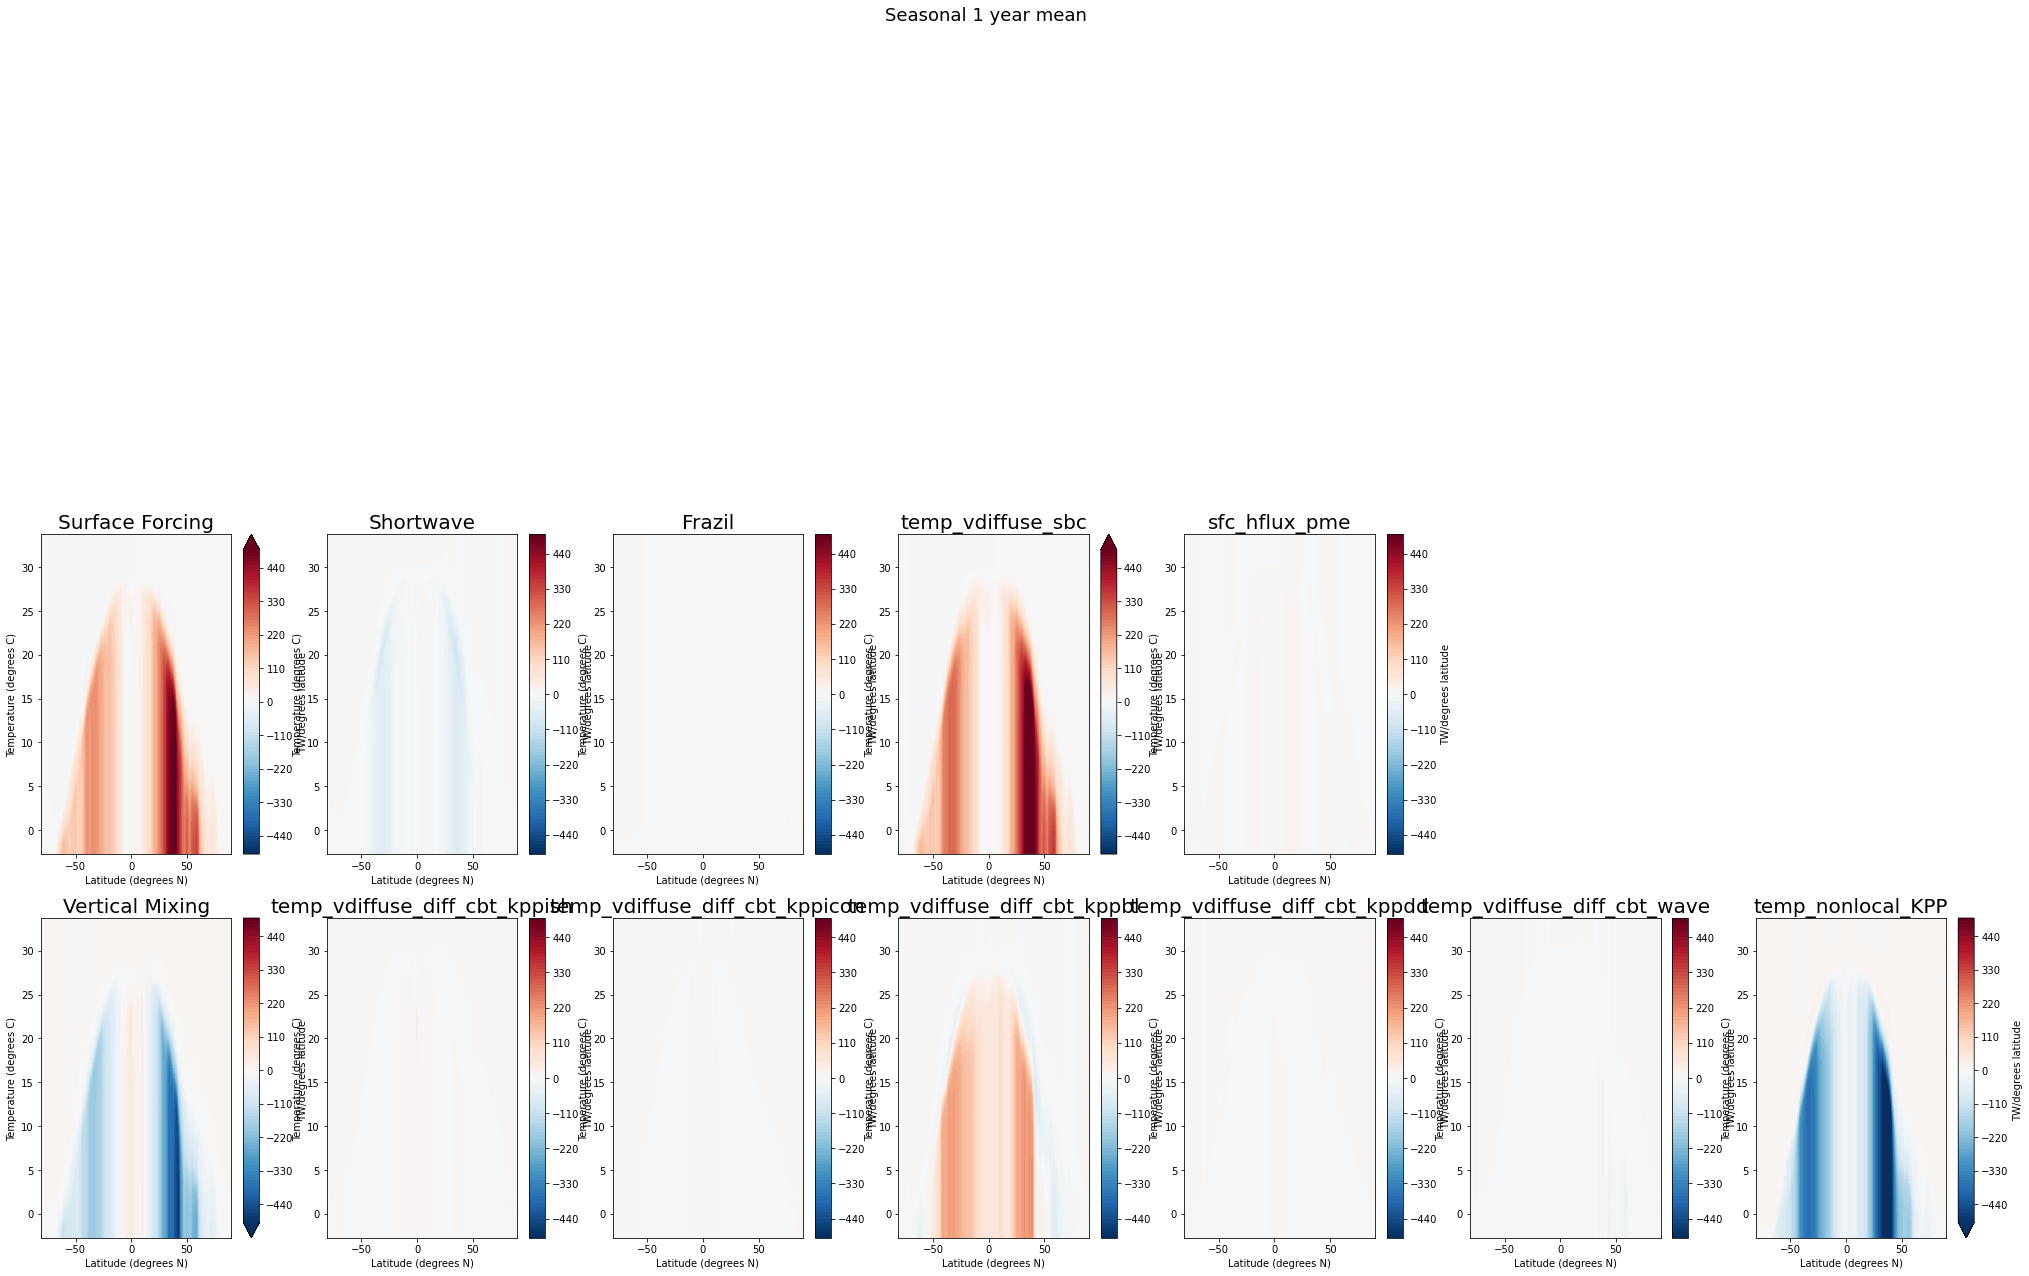

In [13]:
DataSet = Twomo_mean_1year_means - Mean_1year_means

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)*10
MXcbar = np.arange(-25.,25.,1.)*10

cmap = 'RdBu_r'

plot_decomp_3d_to_2d_cumsum(DataSet, Psicbar, Hfcbar, MXcbar, 'Seasonal 1 year mean')

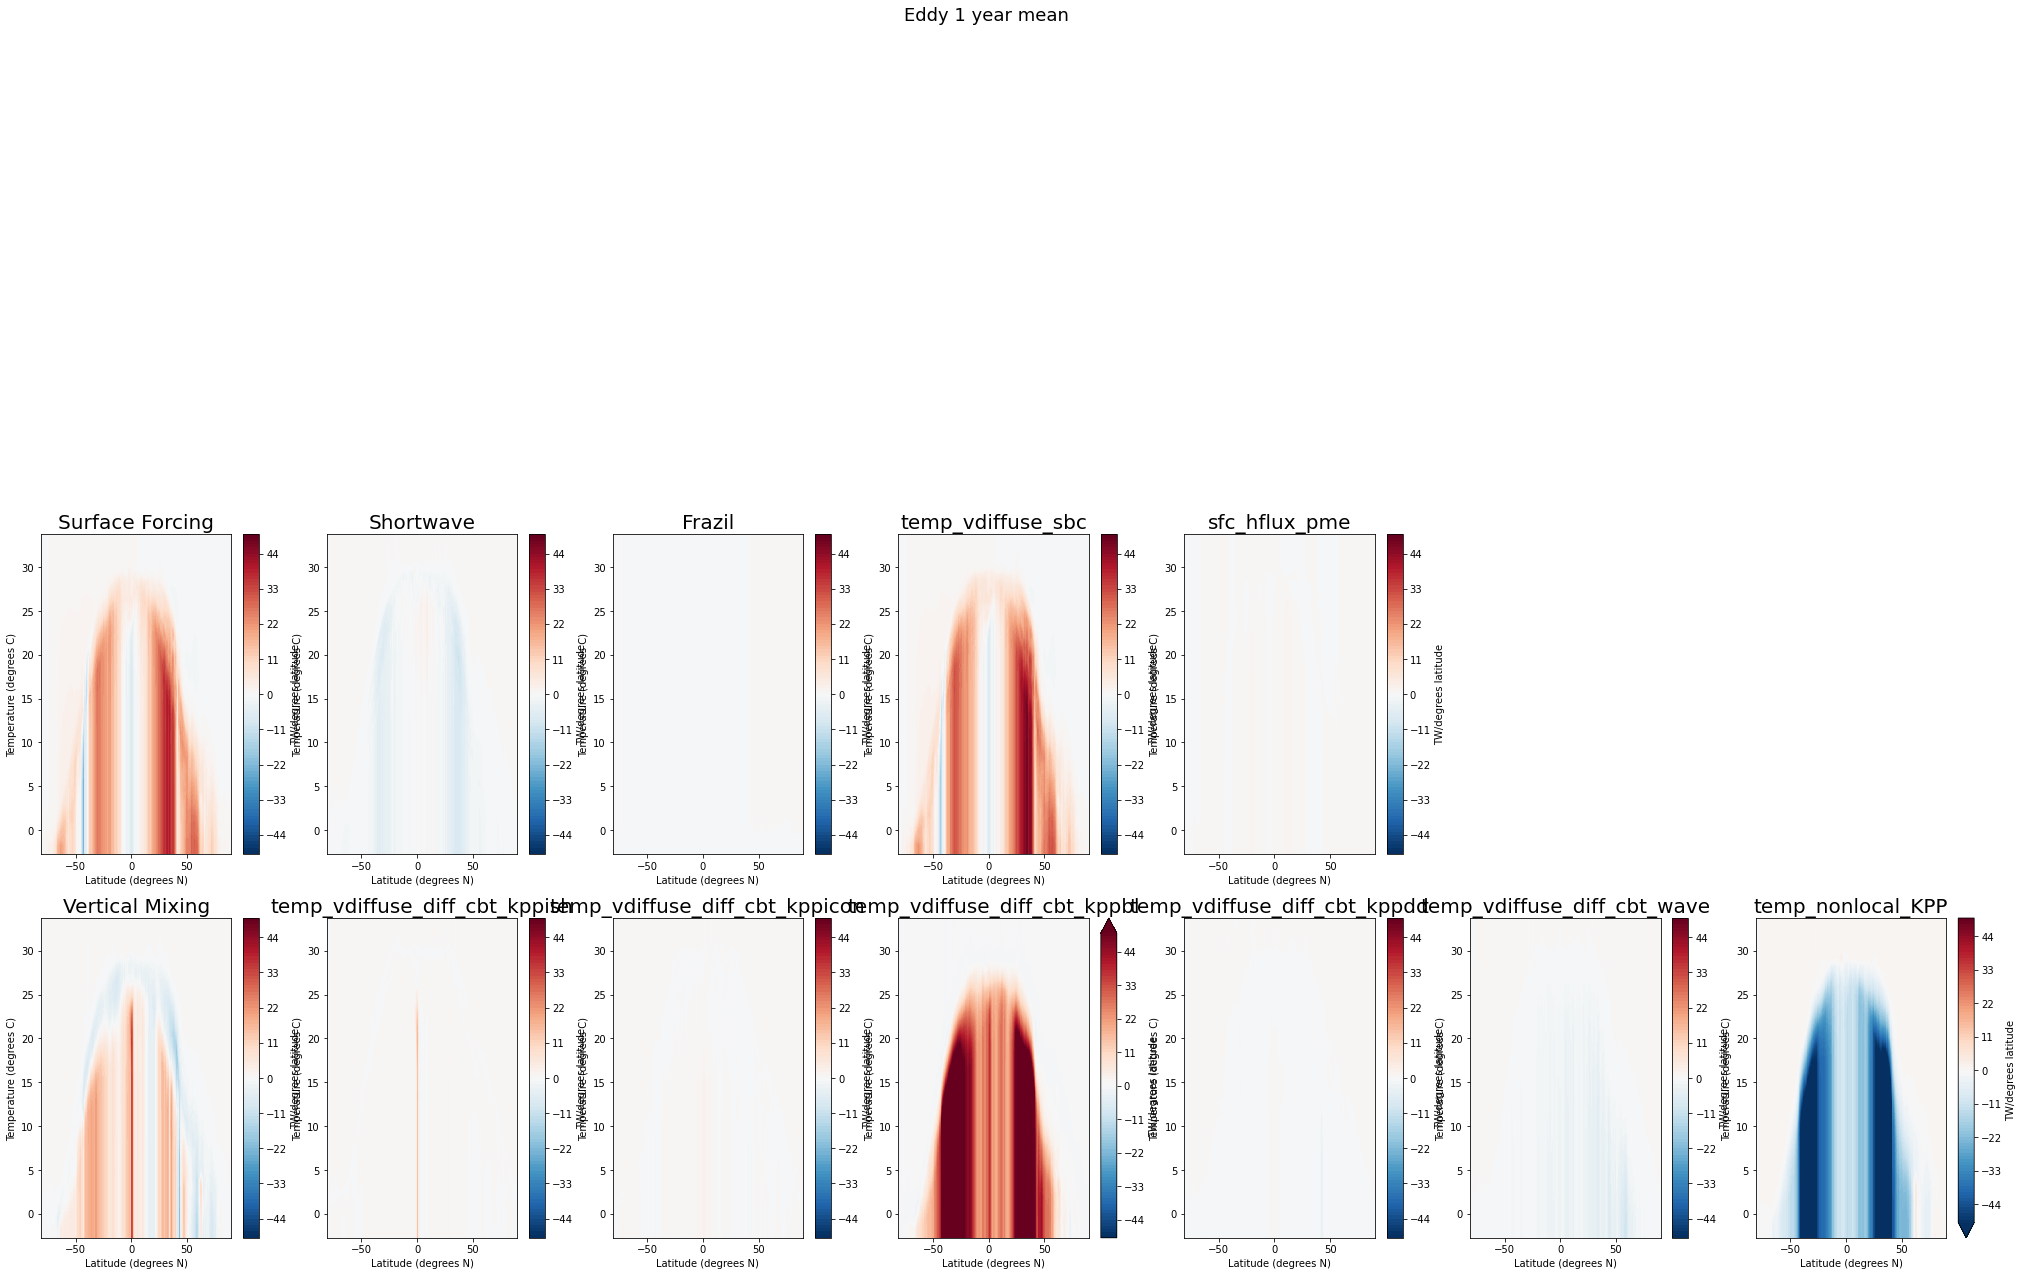

In [18]:
DataSet = Tenday_mean_1year_means - Twomo_mean_1year_means 

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'RdBu_r'

plot_decomp_3d_to_2d_cumsum(DataSet, Psicbar, Hfcbar, MXcbar, 'Eddy 1 year mean')

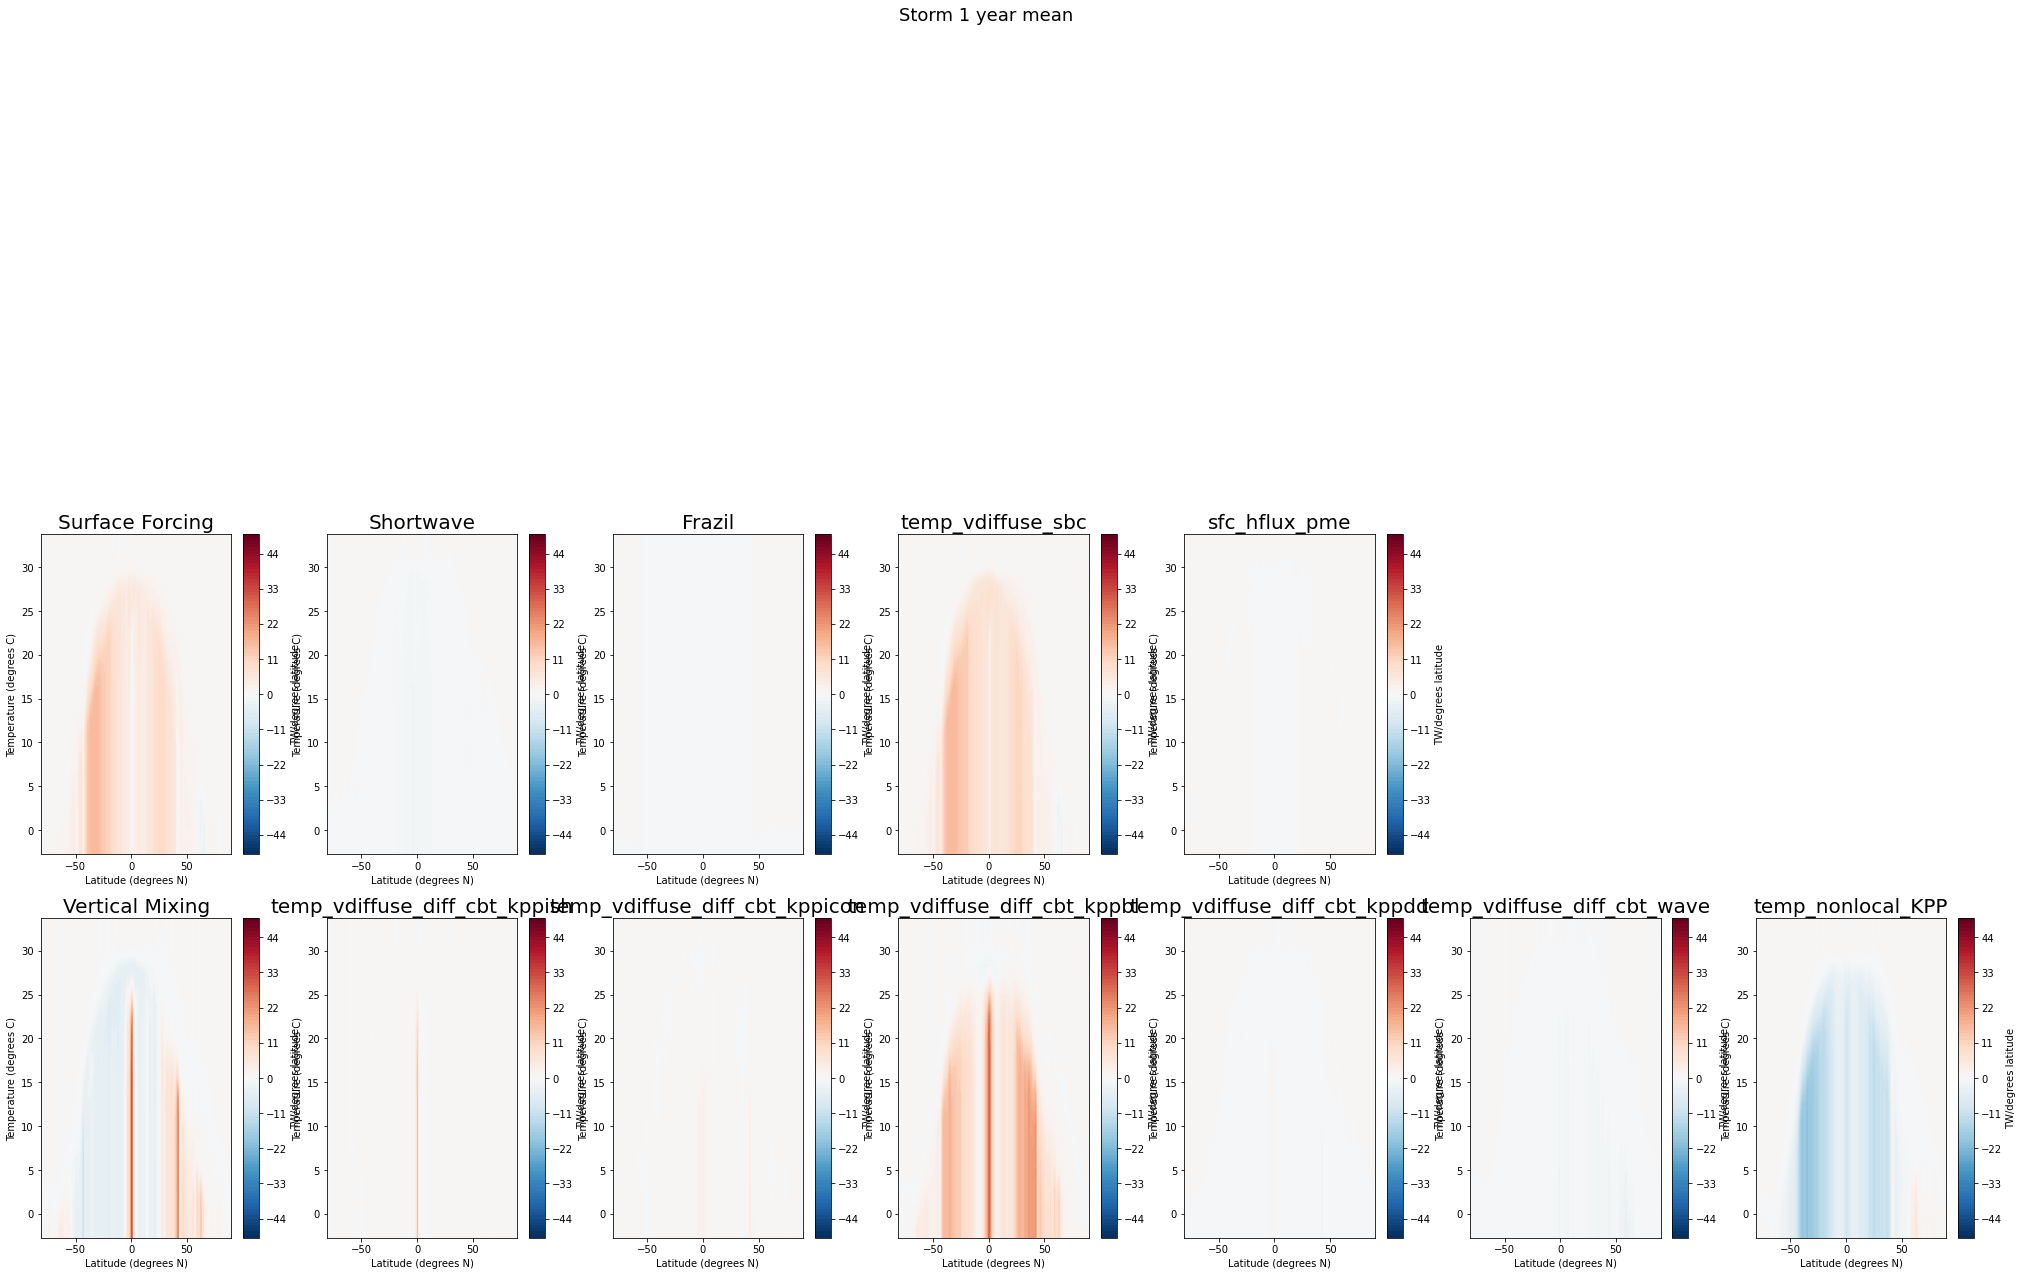

In [19]:
DataSet = Oneday_mean_1year_means  - Tenday_mean_1year_means 

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'RdBu_r'

plot_decomp_3d_to_2d_cumsum(DataSet, Psicbar, Hfcbar, MXcbar, 'Storm 1 year mean')

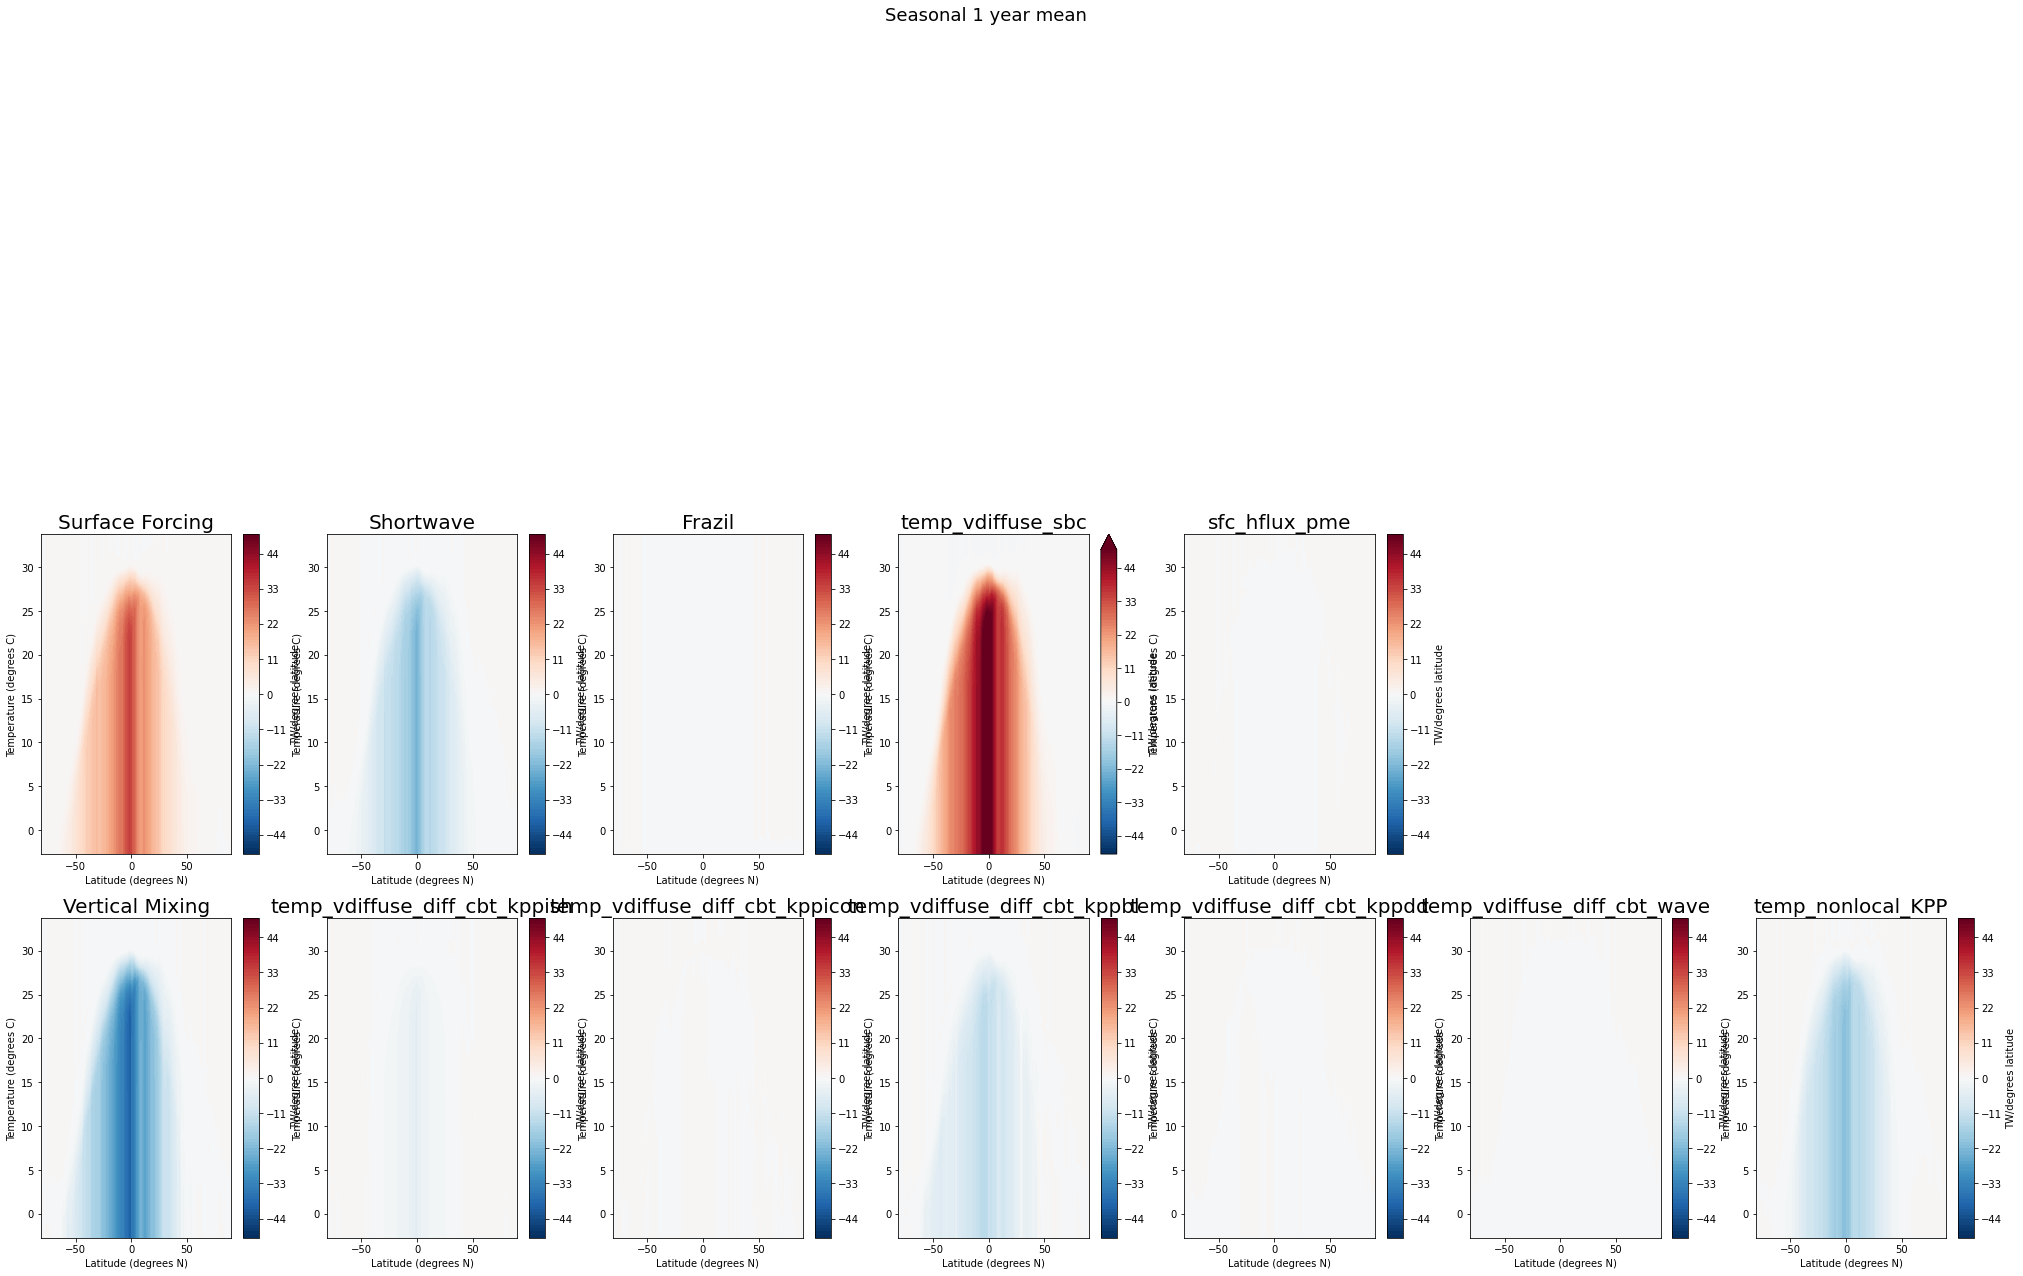

In [20]:
DataSet = True_1year_means - Oneday_mean_1year_means 


Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'RdBu_r'

plot_decomp_3d_to_2d_cumsum(DataSet, Psicbar, Hfcbar, MXcbar, 'Seasonal 1 year mean')

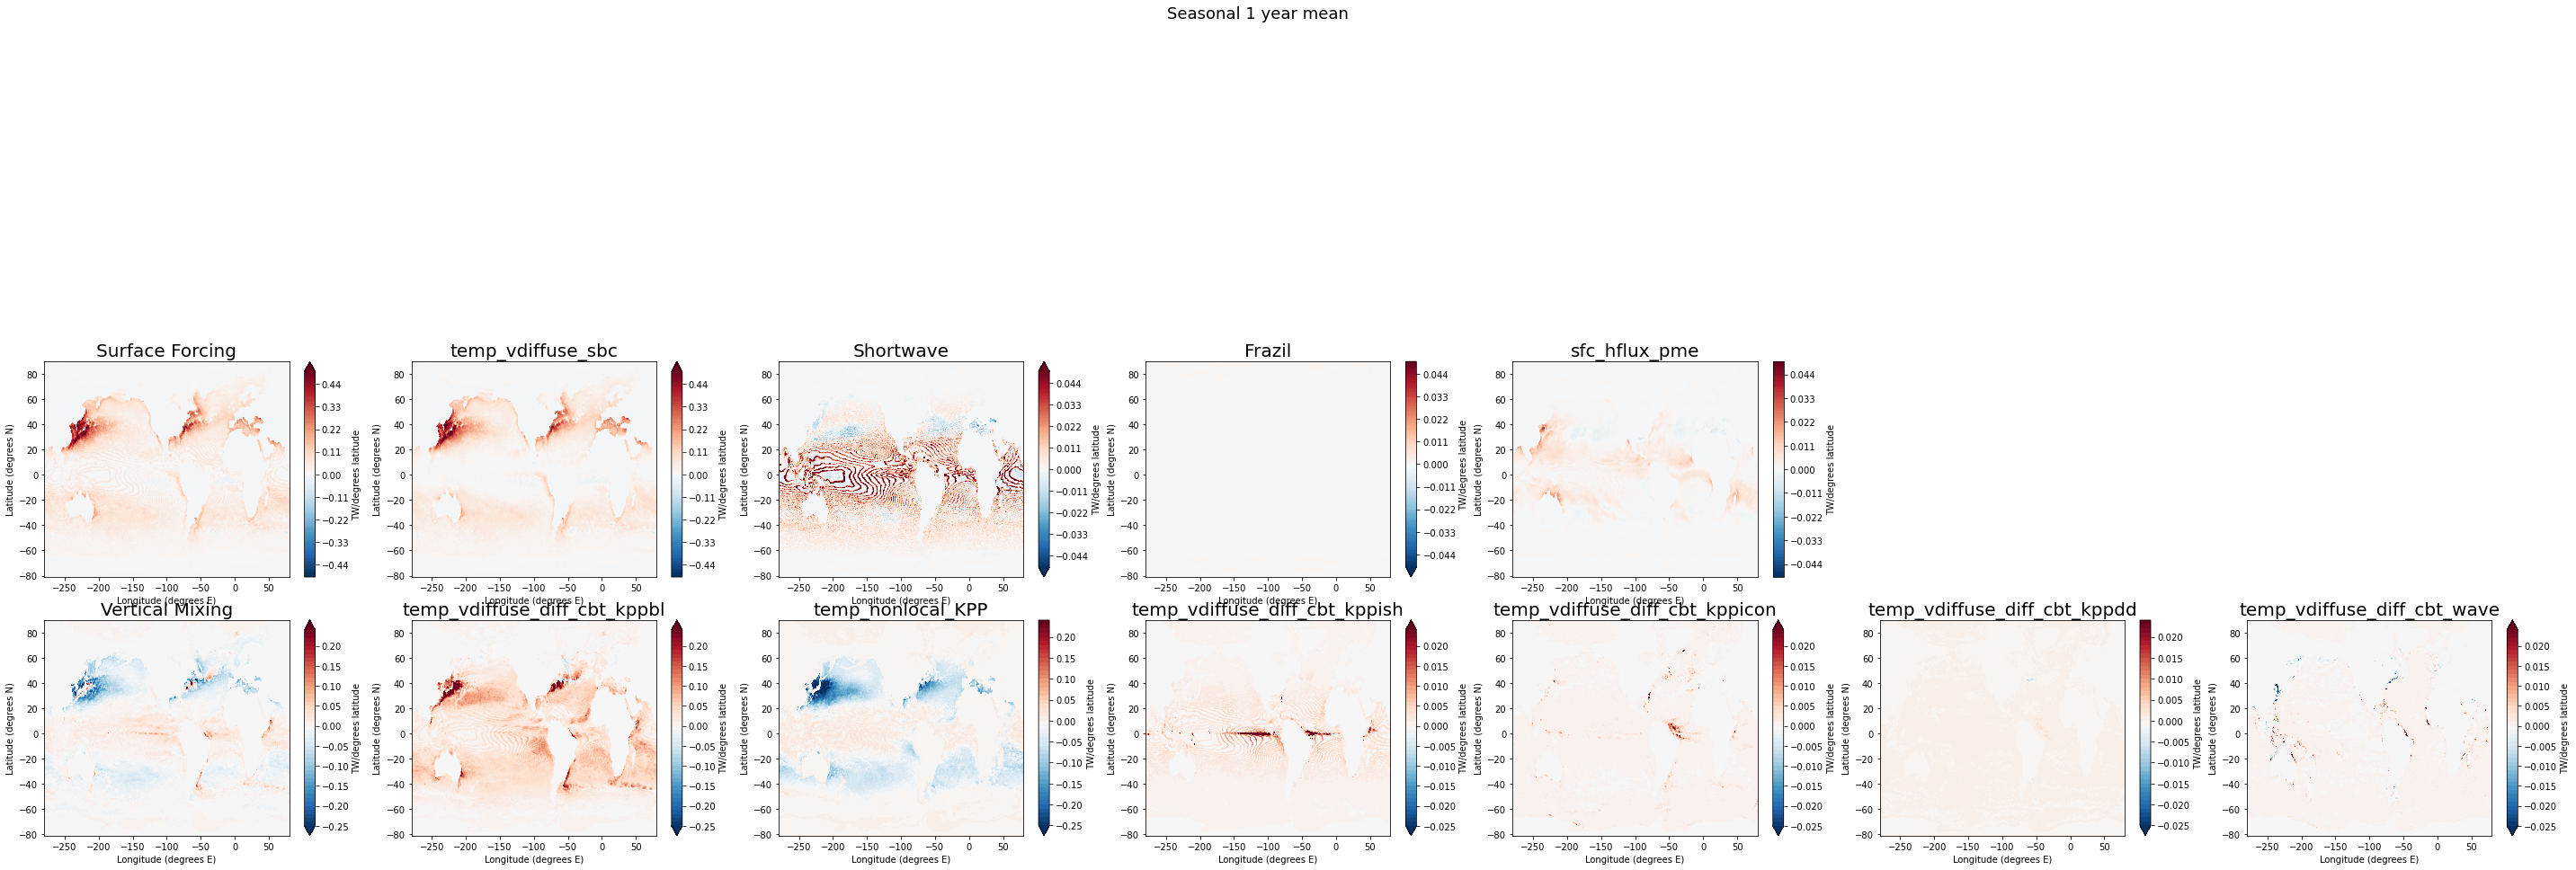

In [26]:
DataSet = Twomo_mean_1year_means - Mean_1year_means

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)/100
MXcbar = np.arange(-25.,25.,1.)/100

cmap = 'RdBu_r'

plot_decomp_map(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar/10, MXcbar/10,'Seasonal 1 year mean')

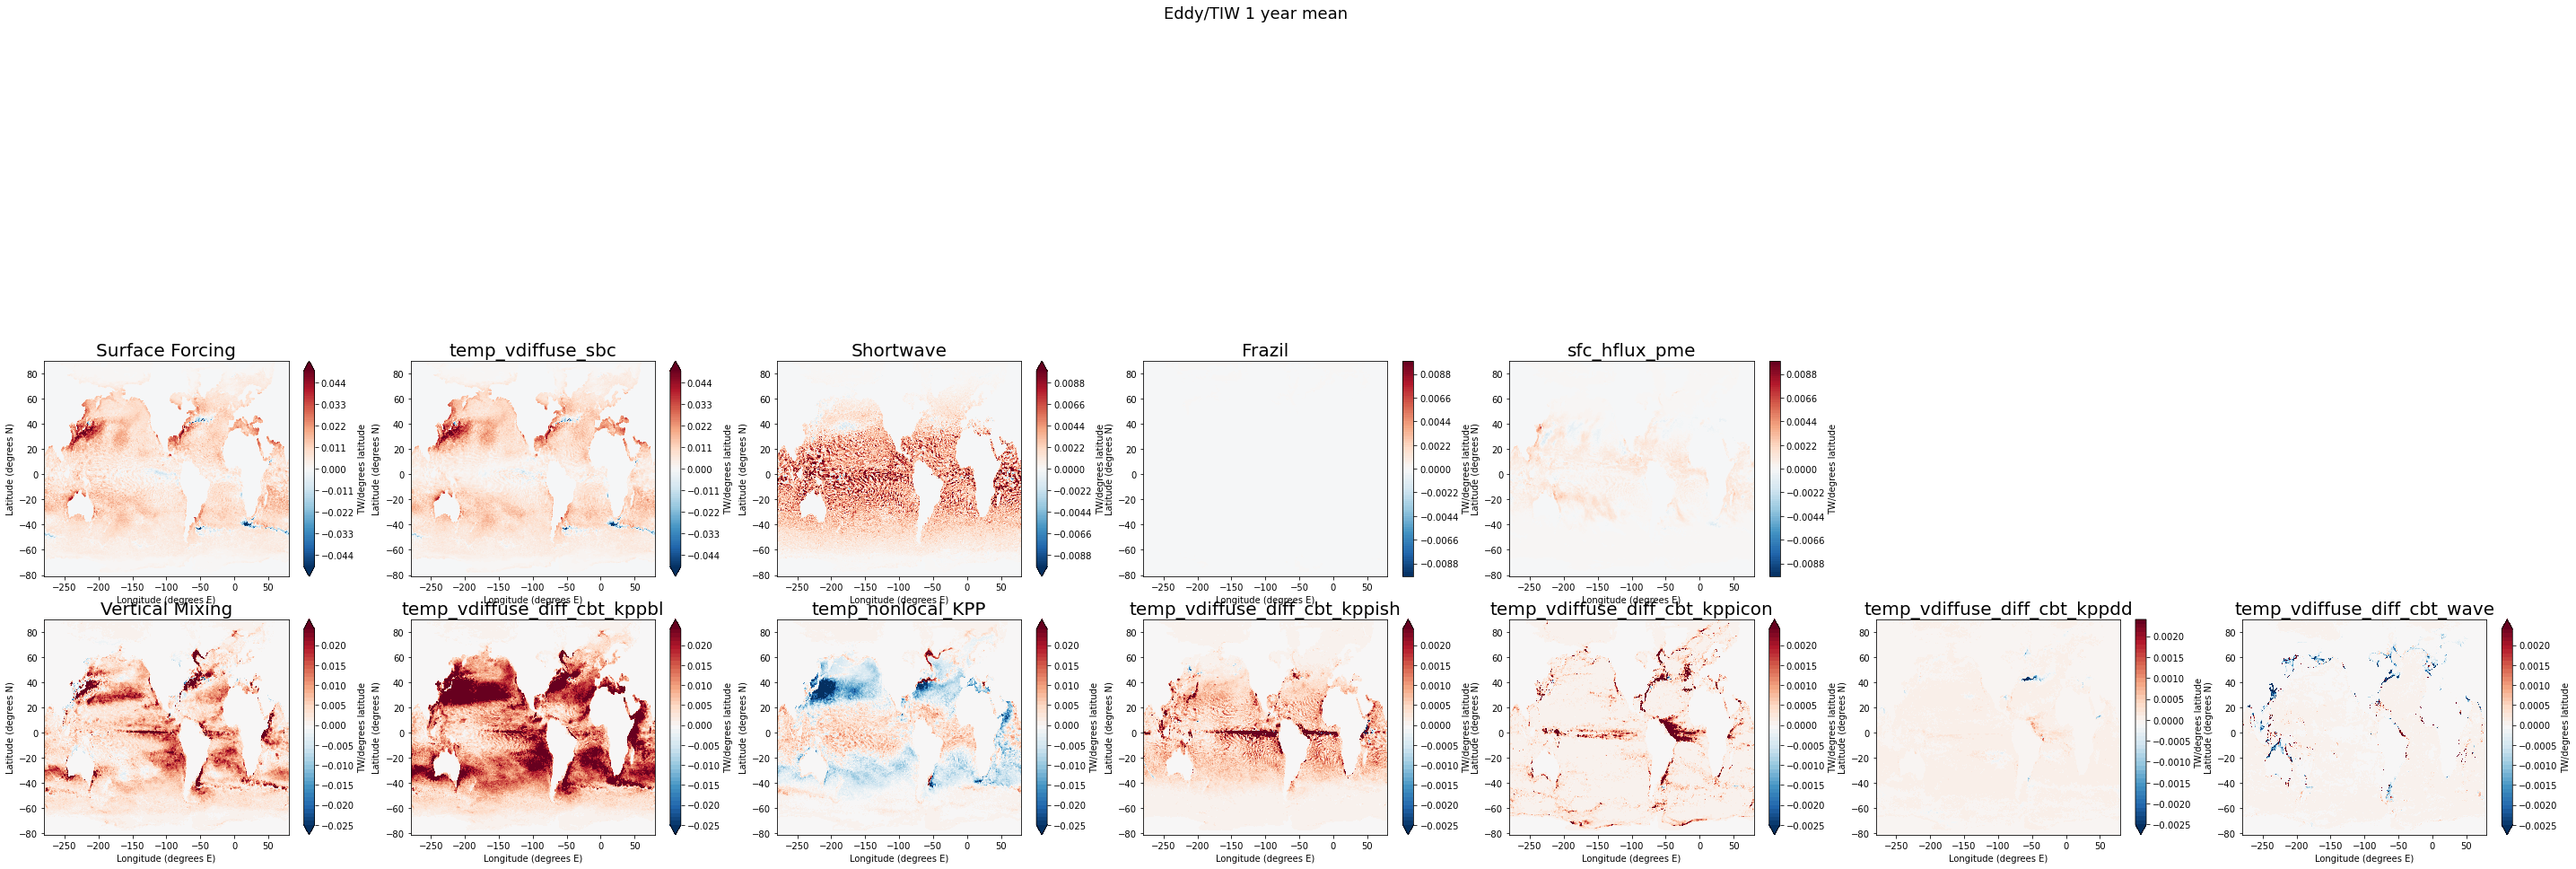

In [23]:
DataSet = Tenday_mean_1year_means - Twomo_mean_1year_means 

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)/1000
MXcbar = np.arange(-25.,25.,1.)/1000

cmap = 'RdBu_r'

plot_decomp_map(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar/5, MXcbar/10,'Eddy/TIW 1 year mean')

2022-05-05 17:11:13,202 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 21.98 GiB -- Worker memory limit: 31.25 GiB
2022-05-05 17:11:13,253 - distributed.worker_memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker.html#memtrim for more information. -- Unmanaged memory: 21.98 GiB -- Worker memory limit: 31.25 GiB


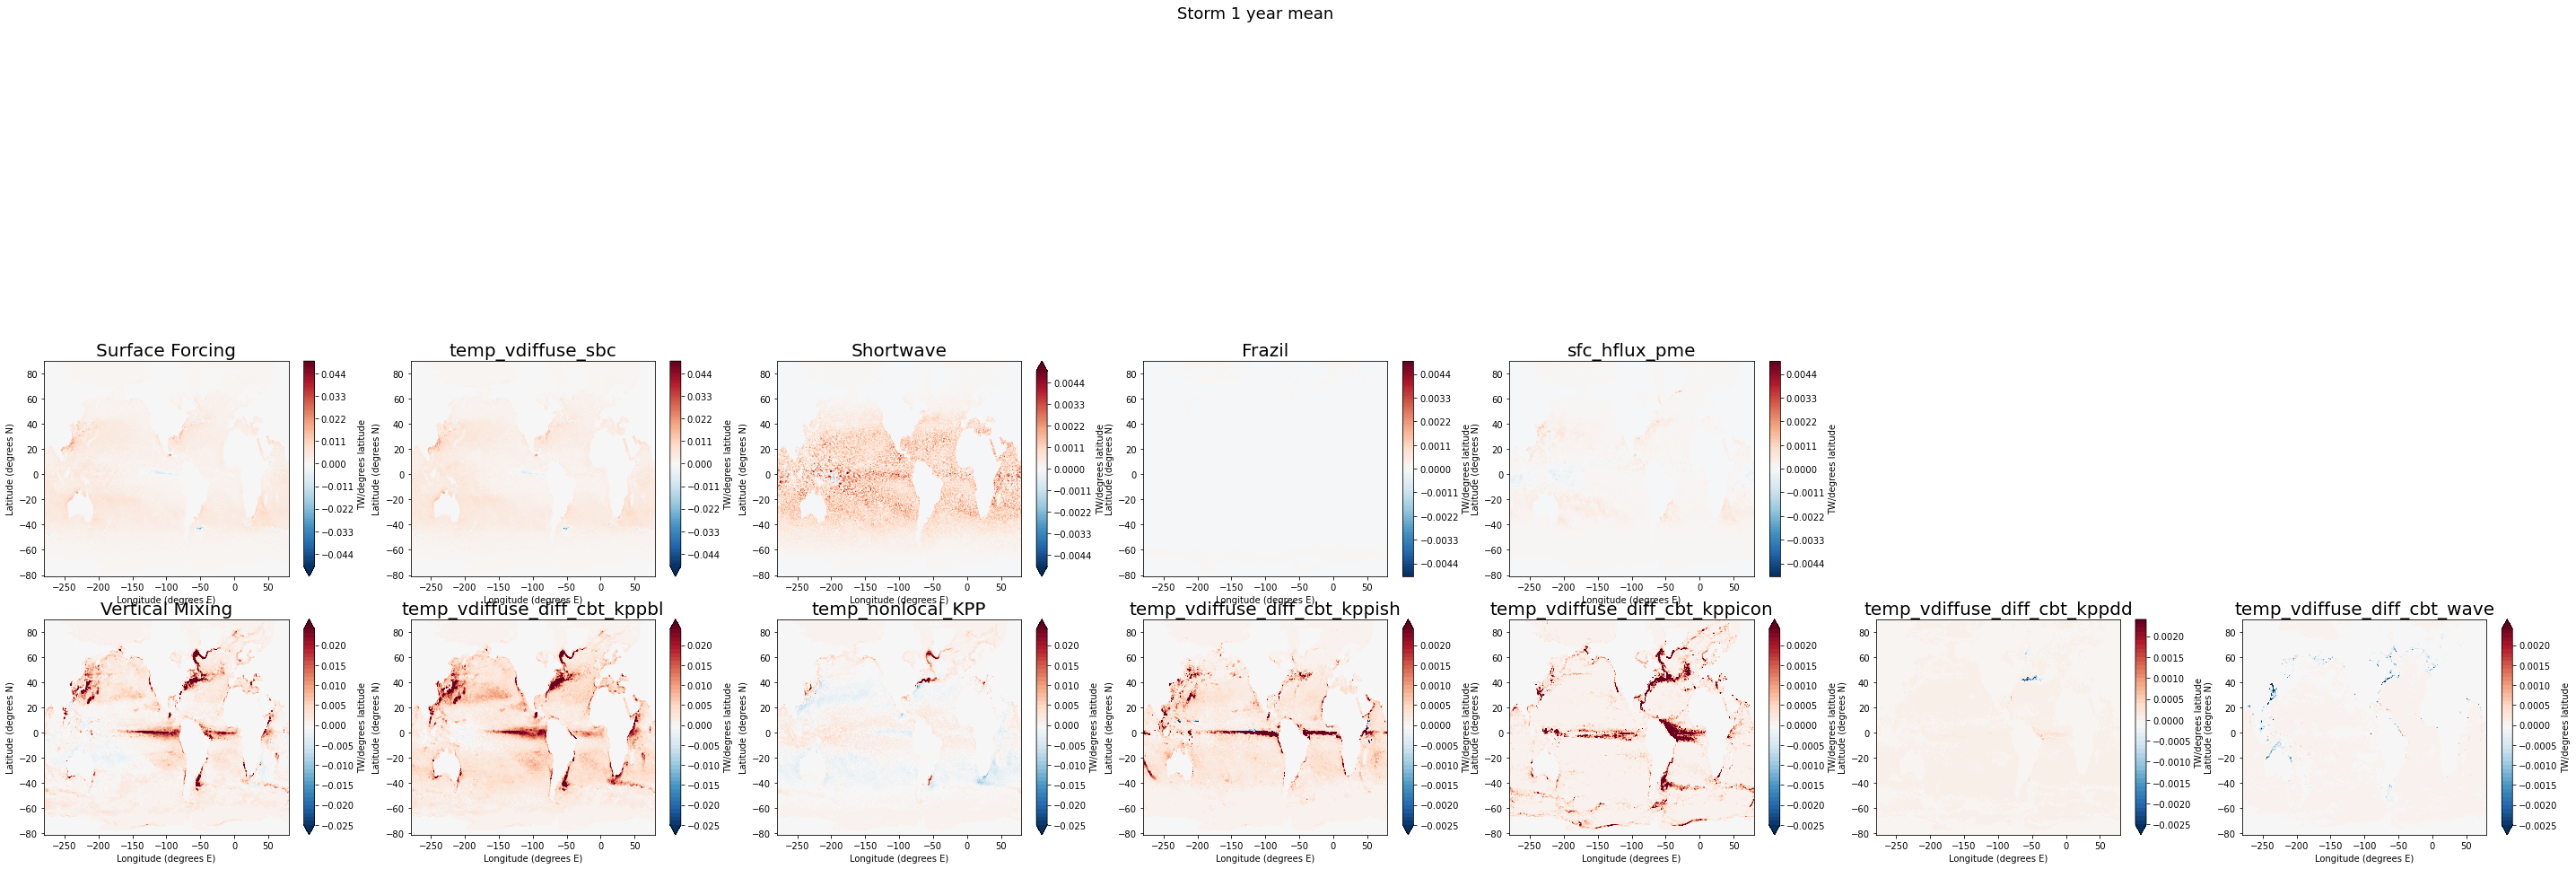

In [28]:
DataSet = Oneday_mean_1year_means  - Tenday_mean_1year_means 

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)/1000
MXcbar = np.arange(-25.,25.,1.)/1000

cmap = 'RdBu_r'

plot_decomp_map(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar/10, MXcbar/10,'Storm 1 year mean')

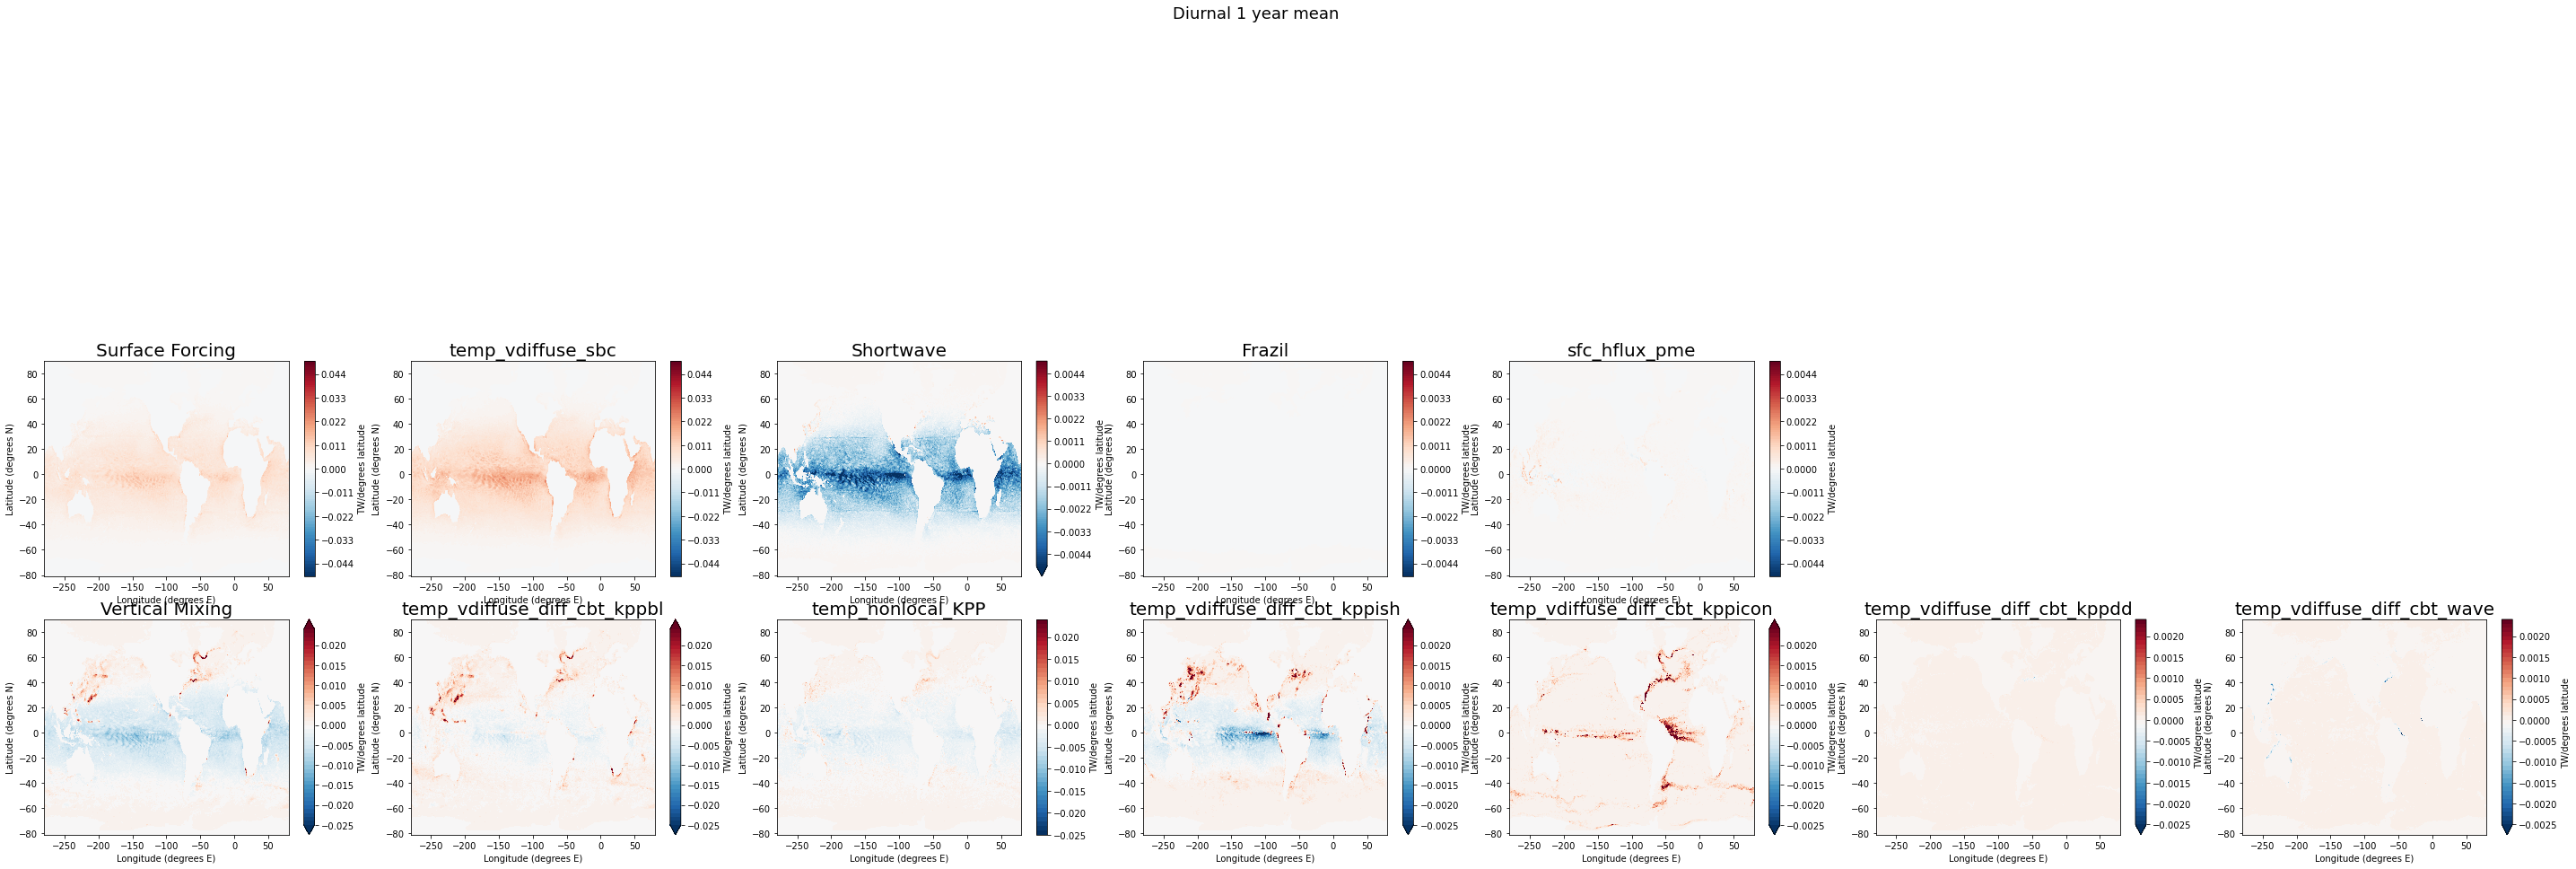

In [14]:
DataSet = True_1year_means - Oneday_mean_1year_means 

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)/1000
MXcbar = np.arange(-25.,25.,1.)/1000

cmap = 'RdBu_r'

plot_decomp_map(DataSet, Psicbar, Hfcbar, SFcbar, MXcbar, SFcbar/10, MXcbar/10,'Diurnal 1 year mean')

## Nice Plots
(Need LT vs seasonal separation)

In [9]:
Psi = True_1year_means.Psi
Psi_mean_tot = Mean_1year_means.Psi
Psi_ac = (Twomo_mean_1year_means - Mean_1year_means).Psi
Psi_TIWs = (Tenday_mean_1year_means - Twomo_mean_1year_means).Psi
Psi_storm = (Oneday_mean_1year_means- Tenday_mean_1year_means).Psi
Psi_diurnal = (True_1year_means-Oneday_mean_1year_means).Psi

In [10]:
SF = True_1year_means.SF
SF_mean_tot = Mean_1year_means.SF
SF_ac = (Twomo_mean_1year_means - Mean_1year_means).SF
SF_TIWs = (Tenday_mean_1year_means - Twomo_mean_1year_means).SF
SF_storm = (Oneday_mean_1year_means- Tenday_mean_1year_means).SF
SF_diurnal = (True_1year_means-Oneday_mean_1year_means).SF

In [11]:
MX = True_1year_means.MX
MX_mean_tot = Mean_1year_means.MX
MX_ac = (Twomo_mean_1year_means - Mean_1year_means).MX
MX_TIWs = (Tenday_mean_1year_means - Twomo_mean_1year_means).MX
MX_storm = (Oneday_mean_1year_means- Tenday_mean_1year_means).MX
MX_diurnal = (True_1year_means-Oneday_mean_1year_means).MX

In [12]:
Hf = -Cp*rho0*dT*gridwm.cumsum(True_1year_means.Psi,'T',boundary="fill", fill_value=0)
Hf_mean_tot = -Cp*rho0*dT*gridwm.cumsum(Mean_1year_means.Psi,'T',boundary="fill", fill_value=0)
Hf_ac = -Cp*rho0*dT*gridwm.cumsum((Twomo_mean_1year_means - Mean_1year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_TIWs = -Cp*rho0*dT*gridwm.cumsum((Tenday_mean_1year_means - Twomo_mean_1year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_storm = -Cp*rho0*dT*gridwm.cumsum((Oneday_mean_1year_means- Tenday_mean_1year_means).Psi,'T',boundary="fill", fill_value=0)
Hf_diurnal = -Cp*rho0*dT*gridwm.cumsum((True_1year_means-Oneday_mean_1year_means).Psi,'T',boundary="fill", fill_value=0)


In [13]:
# masking:
maskPsi = 0*True_1year_means.Psi.sum('grid_xt_ocean').where(True_1year_means.Psi.sum('grid_xt_ocean')!=True_1year_means.Psi.sum('grid_xt_ocean').isel(neutralrho_edges=-1))+1.
maskHf = gridwm.interp(maskPsi,'T')
maskSF = gridwm.interp(maskPsi,'y',boundary="fill",fill_value=0.)
maskSF


<xarray.DataArray 'mul-771a00c78673abd870c14850b77ca25a' (neutralrho_edges: 75,
                                                          grid_yt_ocean: 1080)>
dask.array<mul, shape=(75, 1080), dtype=float64, chunksize=(75, 1079), chunktype=numpy.ndarray>
Coordinates:
  * neutralrho_edges  (neutralrho_edges) float64 -3.0 -2.5 -2.0 ... 33.5 34.0
  * grid_yt_ocean     (grid_yt_ocean) float64 -81.08 -80.97 ... 89.84 89.95

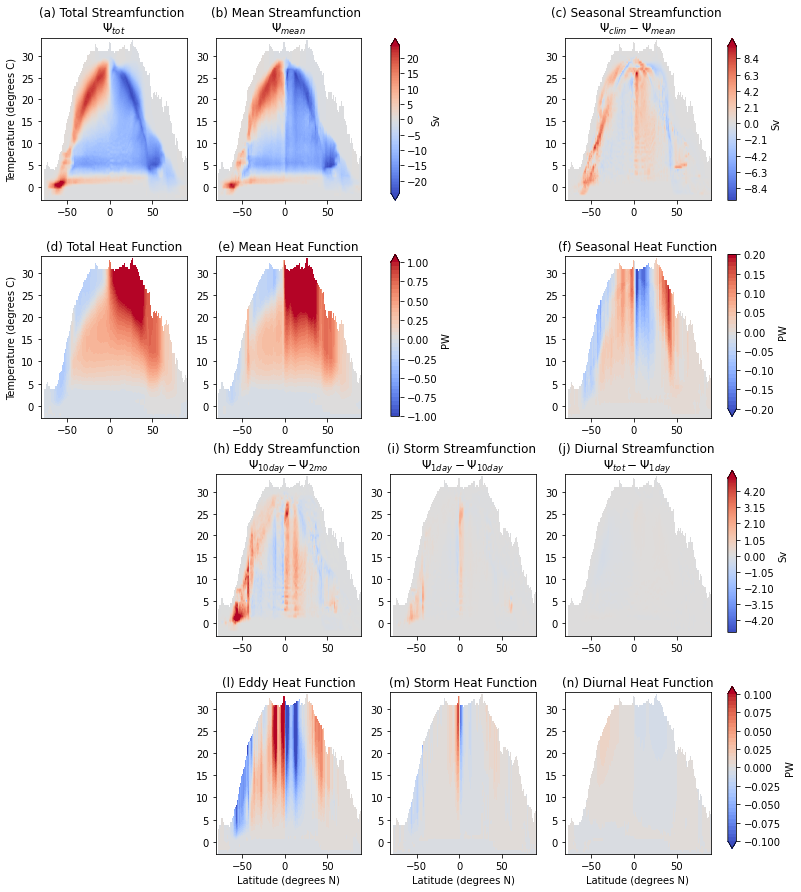

In [14]:
# Plotting:
fig = plt.figure(figsize=(12,15),facecolor='w')

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'coolwarm'

# Saturated bars for the seasonal/eddy terms:
sat = True
if (sat):
    Psicbar_sc = np.arange(-10.,10.1,0.1)
    Hfcbar_sc = np.arange(-0.2,0.21,0.01)
    SFcbar_sc = np.arange(-50.,51.,1.)
    MXcbar_sc = np.arange(-25.,25.,1.)
    Psicbar_e = np.arange(-5.,5.1,0.05)
    Hfcbar_e = np.arange(-0.1,0.105,0.005)
    SFcbar_e = np.arange(-5.,5.1,0.1)
    MXcbar_e = np.arange(-2.5,2.51,0.1)
else:
    Psicbar_sc = Psicbar
    Hfcbar_sc = Hfcbar
    SFcbar_sc = SFcbar
    MXcbar_sc = MXcbar
    Psicbar_e = Psicbar
    Hfcbar_e = Hfcbar
    SFcbar_e = SFcbar
    MXcbar_e = MXcbar

plt.subplot(4,4,1)
(Psi.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(a) Total Streamfunction \n$\Psi_{tot}$')
plt.ylabel('Temperature (degrees C)')
plt.xlabel('')

plt.subplot(4,4,2)
cb_SFrow1mean = (Psi_mean_tot.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(b) Mean Streamfunction \n$\Psi_{mean}$')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,4)
cb_SFrow1 = (Psi_ac.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar_sc,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(c) Seasonal Streamfunction \n$\Psi_{clim}-\Psi_{mean}$')
plt.ylabel('')
plt.xlabel('')

# plt.subplot(4,4,9)
# cb_SFrow2 = (Psi_lt.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar_e,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
# plt.title('(g) LT Streamfunction \n$\Psi_{2mo}-\Psi_{clim}$')
# plt.ylabel('Temperature (degrees C)')
# plt.xlabel('')

plt.subplot(4,4,10)
cb_SFrow2 =(Psi_TIWs.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar_e,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(h) Eddy Streamfunction \n$\Psi_{10day}-\Psi_{2mo}$')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,11)
(Psi_storm.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar_e,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(i) Storm Streamfunction \n$\Psi_{1day}-\Psi_{10day}$')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,12)
(Psi_diurnal.sum('grid_xt_ocean').where(maskPsi==1.)/1.e6).plot.contourf(levels=Psicbar_e,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(j) Diurnal Streamfunction \n$\Psi_{tot}-\Psi_{1day}$')
plt.ylabel('')
plt.xlabel('')


plt.subplot(4,4,5)
(Hf.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(d) Total Heat Function')
plt.ylabel('Temperature (degrees C)')
plt.xlabel('')

plt.subplot(4,4,6)
cb_Hfrow1mean = (Hf_mean_tot.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(e) Mean Heat Function')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,8)
cb_Hfrow1 = (Hf_ac.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar_sc,x='grid_yu_ocean',add_colorbar = False,cmap=cmap)
plt.title('(f) Seasonal Heat Function')
plt.ylabel('')
plt.xlabel('')

# plt.subplot(4,4,13)
# cb_Hfrow2 = (Hf_lt.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar_e,x='grid_yu_ocean',cmap=cmap, add_colorbar = False)
# plt.title('(k) LT Heat Function')
# plt.ylabel('Temperature (degrees C)')
# plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,14)
cb_Hfrow2 =(Hf_TIWs.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar_e,x='grid_yu_ocean',cmap=cmap, add_colorbar = False)
plt.title('(l) Eddy Heat Function')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,15)
(Hf_storm.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar_e,x='grid_yu_ocean',cmap=cmap, add_colorbar = False)
plt.title('(m) Storm Heat Function')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,16)
(Hf_diurnal.sum('grid_xt_ocean').where(maskHf==1.)/1.e15).plot.contourf(levels=Hfcbar_e,x='grid_yu_ocean',cmap=cmap, add_colorbar = False)
plt.title('(n) Diurnal Heat Function')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

fig.subplots_adjust(wspace = 0.2, hspace = 0.35, right = 0.9)

ax_cb = plt.axes([0.53,0.73,0.01,0.15])
plt.colorbar(cb_SFrow1mean, cax = ax_cb, label = 'Sv')


ax_cb = plt.axes([0.53,0.53,0.01,0.15])
plt.colorbar(cb_Hfrow1mean, cax = ax_cb, label = 'PW')


ax_cb = plt.axes([0.92,0.73,0.01,0.15])
plt.colorbar(cb_SFrow1, cax = ax_cb, label = 'Sv')


ax_cb = plt.axes([0.92,0.53,0.01,0.15])
plt.colorbar(cb_Hfrow1, cax = ax_cb, label = 'PW')


ax_cb = plt.axes([0.92,0.33,0.01,0.15])
plt.colorbar(cb_SFrow2, cax = ax_cb, label = 'Sv')


ax_cb = plt.axes([0.92,0.13,0.01,0.15])
plt.colorbar(cb_Hfrow2, cax = ax_cb, label = 'PW')


#plt.tight_layout()
plt.savefig('Decomposition_stream_and_heat_func_sat.png',dpi = 200)

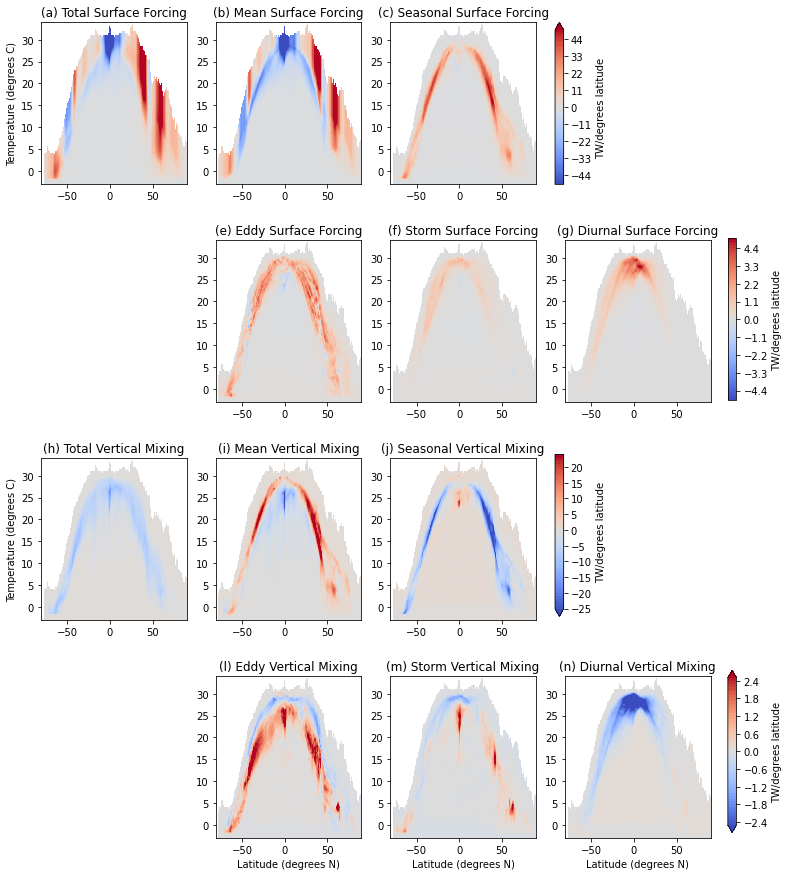

In [15]:
# Plotting:
fig = plt.figure(figsize=(12,15),facecolor='w')

Psicbar = np.arange(-24.,24.5,0.5)
Hfcbar = np.arange(-1.,1.05,0.05)
SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-25.,25.,1.)

cmap = 'coolwarm'

# Saturated bars for the seasonal/eddy terms:
sat = True
if (sat):
    Psicbar_sc = np.arange(-10.,10.1,0.1)
    Hfcbar_sc = np.arange(-0.2,0.21,0.01)
    SFcbar_sc = np.arange(-50.,51.,1.)
    MXcbar_sc = np.arange(-25.,25.,1.)
    Psicbar_e = np.arange(-5.,5.1,0.05)
    Hfcbar_e = np.arange(-0.1,0.105,0.005)
    SFcbar_e = np.arange(-5.,5.1,0.1)
    MXcbar_e = np.arange(-2.5,2.51,0.1)
else:
    Psicbar_sc = Psicbar
    Hfcbar_sc = Hfcbar
    SFcbar_sc = SFcbar
    MXcbar_sc = MXcbar
    Psicbar_e = Psicbar
    Hfcbar_e = Hfcbar
    SFcbar_e = SFcbar
    MXcbar_e = MXcbar

plt.subplot(4,4,1)
(SF.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(a) Total Surface Forcing')
plt.ylabel('Temperature (degrees C)')
plt.xlabel('')

plt.subplot(4,4,2)
cb_SFrow1mean = (SF_mean_tot.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(b) Mean Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,3)
cb_SFrow1 = (SF_ac.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(c) Seasonal Surface Forcing')
plt.ylabel('')
plt.xlabel('')

# plt.subplot(4,4,5)
# cb_SFrow2 = (SF_lt.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
# plt.title('(d) LT Surface Forcing')
# plt.ylabel('Temperature (degrees C)')
# plt.xlabel('')

plt.subplot(4,4,6)
cb_SFrow2 =(SF_TIWs.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(e) Eddy Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,7)
(SF_storm.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(f) Storm Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,8)
(SF_diurnal.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(g) Diurnal Surface Forcing')
plt.ylabel('')
plt.xlabel('')


plt.subplot(4,4,9)
(MX.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(h) Total Vertical Mixing')
plt.ylabel('Temperature (degrees C)')
plt.xlabel('')

plt.subplot(4,4,10)
cb_MXrow1mean = (MX_mean_tot.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(i) Mean Vertical Mixing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(4,4,11)
cb_MXrow1 = (MX_ac.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(j) Seasonal Vertical Mixing')
plt.ylabel('')
plt.xlabel('')

# plt.subplot(4,4,13)
# cb_MXrow2 = (MX_lt.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
# plt.title('(k) LT Vertical Mixing')
# plt.ylabel('Temperature (degrees C)')
# plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,14)
cb_MXrow2 =(MX_TIWs.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(l) Eddy Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,15)
(MX_storm.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(m) Storm Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(4,4,16)
(MX_diurnal.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('(n) Diurnal Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

fig.subplots_adjust(wspace = 0.2, hspace = 0.35, right = 0.9)

ax_cb = plt.axes([0.72,0.73,0.01,0.15])
plt.colorbar(cb_SFrow1, cax = ax_cb, label = 'TW/degrees latitude')

ax_cb = plt.axes([0.92,0.53,0.01,0.15])
plt.colorbar(cb_SFrow2, cax = ax_cb, label = 'TW/degrees latitude')

ax_cb = plt.axes([0.72,0.33,0.01,0.15])
plt.colorbar(cb_MXrow1, cax = ax_cb, label = 'TW/degrees latitude')

ax_cb = plt.axes([0.92,0.13,0.01,0.15])
plt.colorbar(cb_MXrow2, cax = ax_cb, label = 'TW/degrees latitude')


#plt.tight_layout()
plt.savefig('Decomposition_SF_mixing_sat.png',dpi = 200)

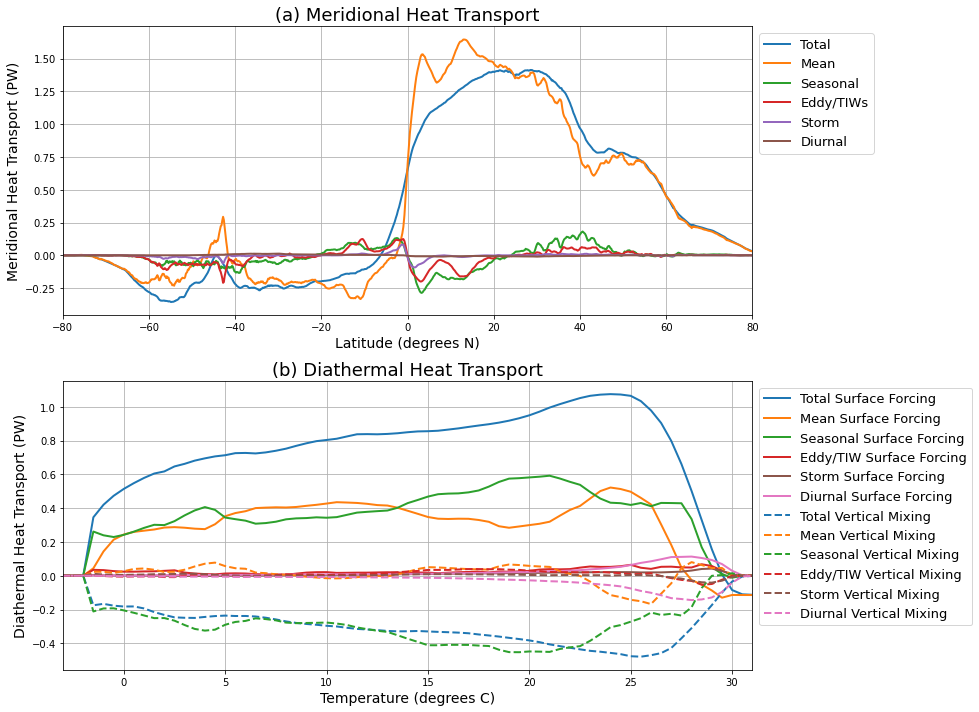

In [16]:
# Totals in temperature and meridional directions:
plt.figure(figsize=(14,10))

plt.subplot(2,1,1)
(Hf.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Total',linewidth=2)
(Hf_mean_tot.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Mean',linewidth=2)
(Hf_ac.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Seasonal',linewidth=2)
(Hf_TIWs.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Eddy/TIWs',linewidth=2)
#(Hf_lt.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='LT',linewidth=2)
(Hf_storm.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Storm',linewidth=2)
(Hf_diurnal.sum('grid_xt_ocean')/1.e15).isel(neutral=-1).plot(label='Diurnal',linewidth=2)

plt.legend(bbox_to_anchor = (1,1),loc='upper left', fontsize = 13)
plt.ylabel('Meridional Heat Transport (PW)', fontsize = 14)
plt.xlabel('Latitude (degrees N)', fontsize = 14)
plt.title('(a) Meridional Heat Transport', fontsize = 18)
plt.grid()
plt.xlim([-80.,80.])

plt.subplot(2,1,2)
(SF.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Total Surface Forcing',color='C0',linewidth=2)
(SF_mean_tot.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Mean Surface Forcing',color='C1',linewidth=2)
(SF_ac.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Seasonal Surface Forcing',color='C2',linewidth=2)
(SF_TIWs.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Eddy/TIW Surface Forcing',color='C3',linewidth=2)
#(SF_lt.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='LT Surface Forcing',color='C4',linewidth=2)
(SF_storm.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Storm Surface Forcing',color='C5',linewidth=2)
(SF_diurnal.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Diurnal Surface Forcing',color='C6',linewidth=2)


(MX.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Total Vertical Mixing',color='C0',linestyle='dashed',linewidth=2)
(MX_mean_tot.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Mean Vertical Mixing',color='C1',linestyle='dashed',linewidth=2)
(MX_ac.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Seasonal Vertical Mixing',color='C2',linestyle='dashed',linewidth=2)
(MX_TIWs.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Eddy/TIW Vertical Mixing',color='C3',linestyle='dashed',linewidth=2)
#(MX_lt.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='LT Vertical Mixing',color='C4',linestyle='dashed',linewidth=2)
(MX_storm.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Storm Vertical Mixing',color='C5',linestyle='dashed',linewidth=2)
(MX_diurnal.sum('grid_xt_ocean')/1.e15).sum('grid_yt_ocean').plot(label='Diurnal Vertical Mixing',color='C6',linestyle='dashed',linewidth=2)

plt.legend(bbox_to_anchor = (1,1),loc='upper left', fontsize = 13)
plt.ylabel('Diathermal Heat Transport (PW)', fontsize = 14)
plt.xlabel('Temperature (degrees C)', fontsize = 14)
plt.title('(b) Diathermal Heat Transport', fontsize = 18)
plt.grid()
plt.xlim([-3.,31.])

plt.tight_layout()
plt.subplots_adjust(right = 0.75)
plt.savefig('MHT_DHT_6timescales.png',dpi = 200)

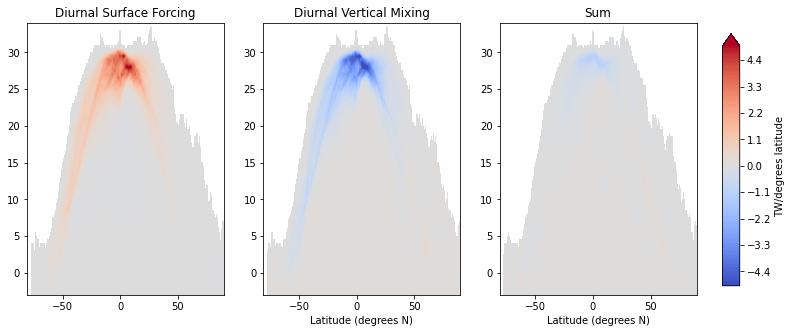

In [19]:
# Plotting:
fig = plt.figure(figsize=(12,5),facecolor='w')

cmap = 'coolwarm'

SFcbar_e = np.arange(-5.,5.1,0.1)
MXcbar_e = np.arange(-5.,5.1,0.1)


plt.subplot(1,3,1)
p = (SF_diurnal.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Diurnal Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,3,2)
(MX_diurnal.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Diurnal Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(1,3,3)
((SF_diurnal+MX_diurnal).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Sum')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

ax_cb = plt.axes([0.93,0.15,0.02,0.7])
plt.colorbar(p, cax = ax_cb, label = 'TW/degrees latitude')


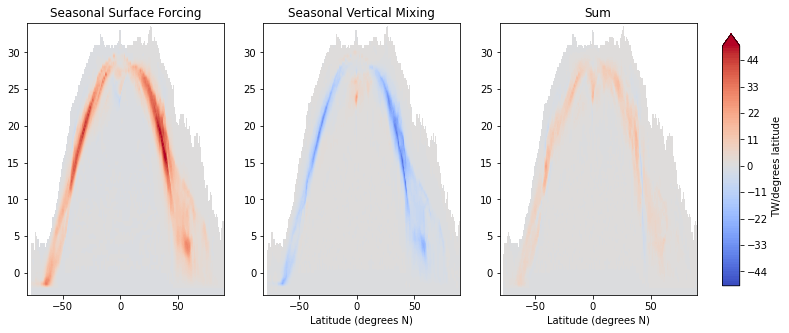

In [20]:
# Plotting:
fig = plt.figure(figsize=(12,5),facecolor='w')

cmap = 'coolwarm'

SFcbar = np.arange(-50.,51.,1.)
MXcbar = np.arange(-50.,51.,1.)


plt.subplot(1,3,1)
p = (SF_ac.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('Seasonal Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,3,2)
(MX_ac.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('Seasonal Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(1,3,3)
((SF_ac+MX_ac).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar,x='grid_yt_ocean',add_colorbar = False,cmap=cmap)
plt.title('Sum')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

ax_cb = plt.axes([0.93,0.15,0.02,0.7])
plt.colorbar(p, cax = ax_cb, label = 'TW/degrees latitude')


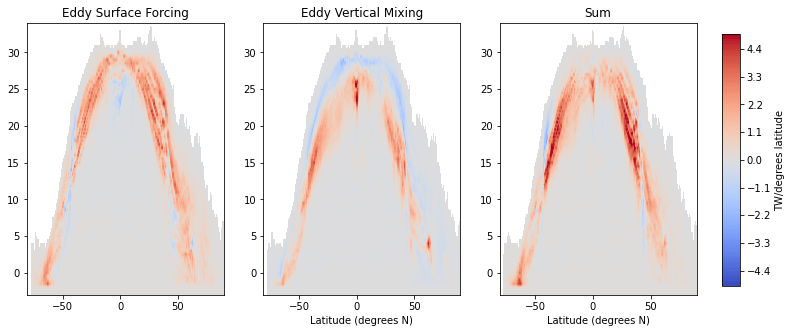

In [21]:
# Plotting:
fig = plt.figure(figsize=(12,5),facecolor='w')

cmap = 'coolwarm'

SFcbar_e = np.arange(-5.,5.1,0.1)
MXcbar_e = np.arange(-5.,5.1,0.1)


plt.subplot(1,3,1)
p = (SF_TIWs.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=SFcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Eddy Surface Forcing')
plt.ylabel('')
plt.xlabel('')

plt.subplot(1,3,2)
(MX_TIWs.sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Eddy Vertical Mixing')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

plt.subplot(1,3,3)
((SF_TIWs+MX_TIWs).sum('grid_xt_ocean').where(maskSF==1.)/1.e12/dy).plot.contourf(levels=MXcbar_e,add_colorbar = False,x='grid_yt_ocean',cmap=cmap)
plt.title('Sum')
plt.ylabel('')
plt.xlabel('Latitude (degrees N)')

ax_cb = plt.axes([0.93,0.15,0.02,0.7])
plt.colorbar(p, cax = ax_cb, label = 'TW/degrees latitude')
